# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**          - Kashmira Kor
##### **Dataset** - https://drive.google.com/file/d/1xJGllnE12mAggLuRo8b0oNSshUlG8GvF/view

# **Project Summary -**

Founded in 1997 by Reed Hastings and Marc Randolph, Netflix (https://www.netflix.com/) is a global entertainment juggernaut that has revolutionised how people consume content. Boasting an extensive library of movies, TV shows, documentaries, and original productions, Netflix stands out for its personalised recommendations, driven by cutting-edge algorithms.

The project aims to conduct an in-depth exploratory data analysis of Netflix content, focusing on understanding content distribution across countries, trends in TV shows versus movies, integration with external datasets for enrichment, clustering similar content based on text-based features, and analyzing user engagement metrics.

By leveraging the dataset alongside external sources like IMDB ratings and Rotten Tomatoes, we can uncover valuable insights into Netflix's content landscape and audience preferences. These insights are crucial for Netflix to refine its content strategy, optimize content acquisition, and enhance user satisfaction and engagement.

Through this project, we aim to provide actionable recommendations for Netflix to strengthen its content portfolio, cater to diverse audience preferences, and maintain its position as a leading streaming service in the ever-evolving entertainment industry.

# **GitHub Link -**

https://github.com/KashmiraKor/Netflix-Movies-And-TV-Shows-Clustering

# **Problem Statement**


As the streaming industry continues to evolve, Netflix, a prominent player in the market, faces the challenge of effectively managing its vast content library to meet the diverse preferences of its global audience. Despite the availability of extensive data on Netflix's content, including TV shows and movies, sourced from platforms like Flixable, there remains a need to extract actionable insights to inform strategic content decisions. Specifically, the project seeks to understand content distribution across different countries, evaluate if Netflix has been shifting its focus from movies to TV shows in recent years, cluster similar content based on text-based features, and analyze user engagement metrics. By doing so, the project aims to provide valuable insights and recommendations to Netflix for refining its content strategy, optimizing content acquisition, and enhancing user satisfaction and engagement on its platform.

# ***Let's Begin !***

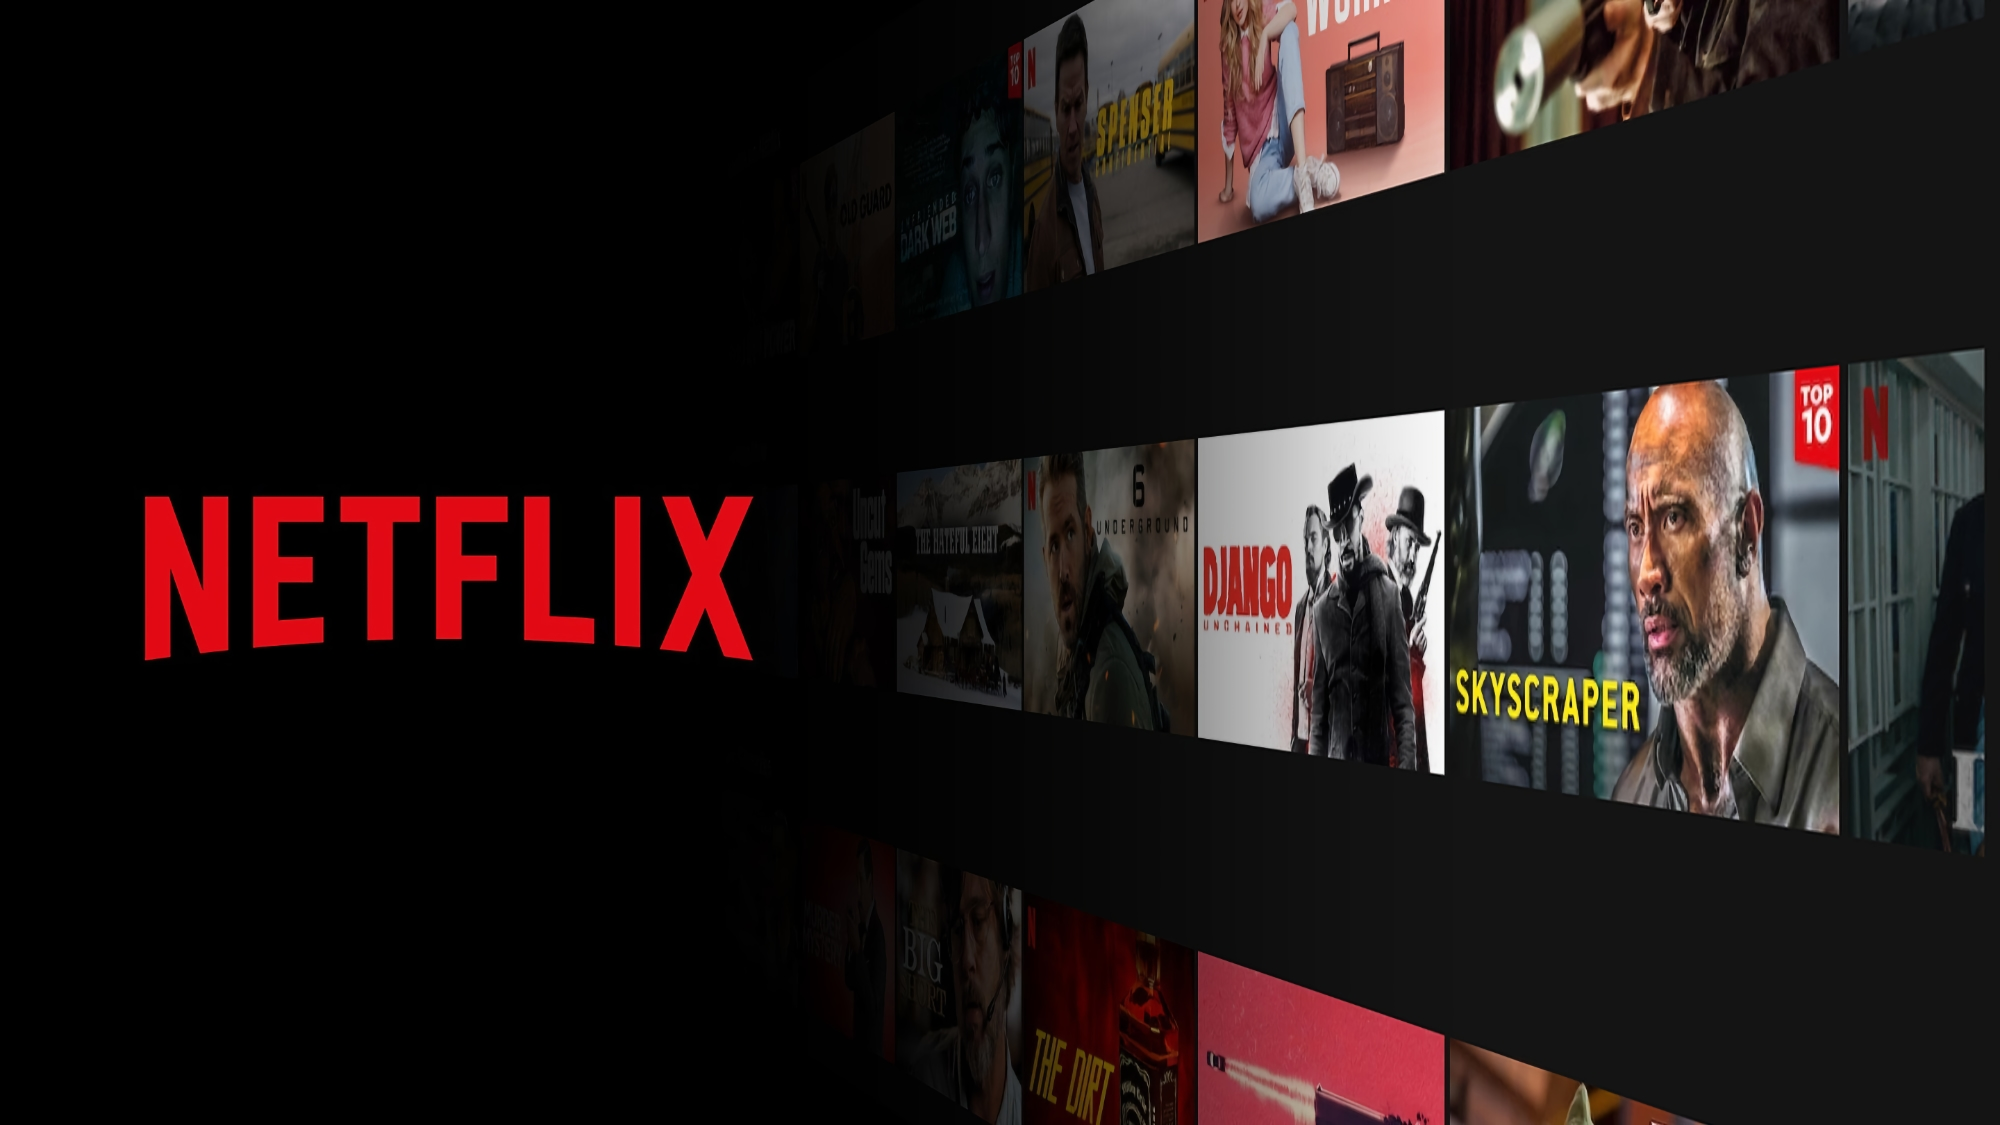

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset from github repository
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, columns = df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 7787
Number of columns: 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

print("Duplicate rows count:", duplicate_count)

Duplicate rows count: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

print("Missing values count in each column:")
print(missing_values_count)

Missing values count in each column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


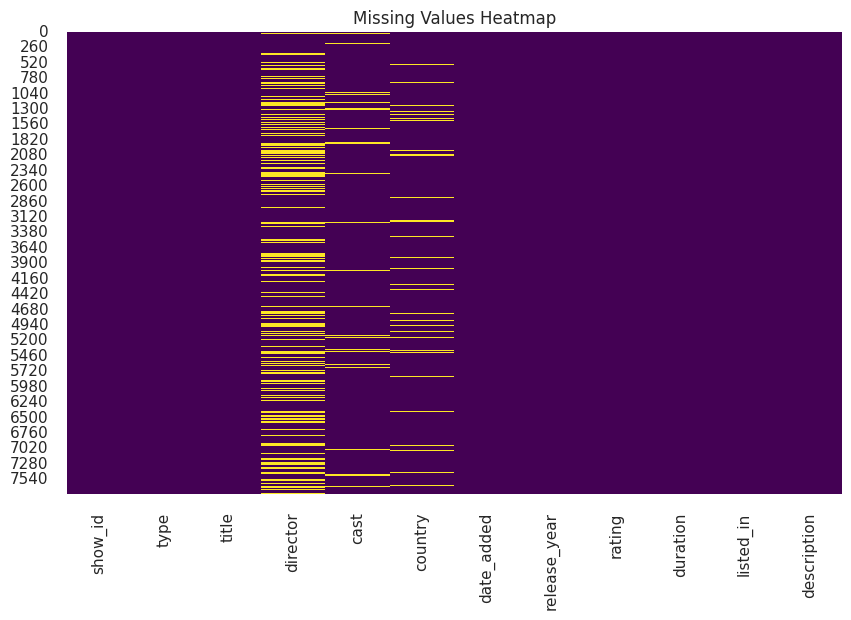

In [ ]:
# Visualizing the missing values - Method 1
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

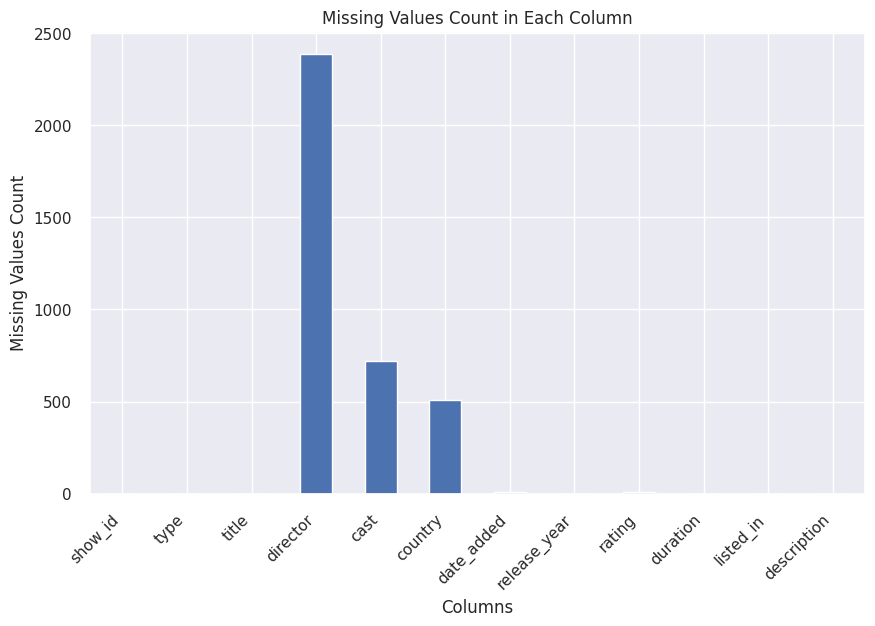

In [ ]:
# Visualizing the missing values - Method 2
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar')
plt.title('Missing Values Count in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### What did you know about your dataset?

Based on the initial exploration of the dataset, here's what we know:

**1. General Information:**

  * The dataset contains 7787 entries and 12 columns.
  * The columns include information such as show ID, type (TV show or movie), title, director, cast, country, date added, release year, rating, duration, listed genres, and description.

**2. Data Types:**

  * Most of the columns are of type object (likely strings), except for the 'release_year' column, which is of type int64.

**3. Missing Values:**

  * Several columns have missing values, notably 'director', 'cast', 'country', 'date_added', and 'rating'.
  * The 'director' column has the most missing values (2389), followed by 'cast' (718) and 'country' (507).
  * There are also 10 missing values in the 'date_added' column and 7 missing values in the 'rating' column.

**4. Duplicates:**

  * There are no duplicate rows in the dataset.
  
**5. Column Analysis:**

  * Certain columns like 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description' could be crucial for analysis and clustering.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
for column in df.columns:
    print(f"Column: {column}")
    print(f"Data Type: {df[column].dtype}")

Column: show_id
Data Type: object
Column: type
Data Type: object
Column: title
Data Type: object
Column: director
Data Type: object
Column: cast
Data Type: object
Column: country
Data Type: object
Column: date_added
Data Type: object
Column: release_year
Data Type: int64
Column: rating
Data Type: object
Column: duration
Data Type: object
Column: listed_in
Data Type: object
Column: description
Data Type: object


In [ ]:
# Dataset Describe
df.describe(include= 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1512           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              119           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description


<b>Variable Information : </b>

- **show_id**: Unique identifier for each show or movie in the dataset.

- **type**: Indicates whether the entry is a TV show or a movie.

- **title**: The title of the TV show or movie.

- **director**: The director(s) of the TV show or movie.

- **cast**: The main cast members of the TV show or movie.

- **country**: The country or countries where the TV show or movie was produced.

- **date_added**: The date when the TV show or movie was added to Netflix.

- **release_year**: The year when the TV show or movie was released.

- **rating**: The age rating or maturity rating of the TV show or movie.

- **duration**: The duration (in minutes or seasons) of the TV show or movie.

- **listed_in**: The categories or genres the TV show or movie belongs to.

- **description**: A brief description or summary of the TV show or movie.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1512
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


## ***3. Data Wrangling***

### Data Wrangling Code

### Creating Copy of Dataset

In [ ]:
# Before doing any data wrangling lets create copy of the dataset
netflix_data = df.copy()

### Filling Null Values

In [ ]:
# Filling cast null values as not available
netflix_data['cast'] = netflix_data['cast'].fillna(value='Not available')

In [ ]:
# Filling contry null values as not known
netflix_data['country'] = netflix_data['country'].fillna(value='Not Known')

In [ ]:
# Dropping Missing Values
netflix_data = netflix_data.dropna(subset=['date_added','rating'])

In [ ]:
# Filling director null values as not known
netflix_data['director'] = netflix_data['director'].fillna(value='Unknown')

In [ ]:
# Checking missing values again for confirmation
netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Verify the dataset after dropping columns
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Changing data types

In [ ]:
# Changing 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
# Displaying the updated data types
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


### What all manipulations have you done and insights you found?

Based on the provided data wrangling code, the following manipulations have been performed:

**1. Creating Copy of Dataset:**
* A copy of the original dataset was created to preserve the integrity of the original data.

**2. Filling Missing Values:**

* The missing values in the 'cast' column were filled with 'Not available'.
* The missing values in the 'country' column were filled with 'Not Known'.
* Rows with missing values in the 'date_added' and 'rating' columns were dropped.
* The missing values in the 'director' column were filled with 'Unknown'.

**3. Checking Missing Values:**

* After the manipulations, the dataset was checked again for missing values to confirm that all missing values were appropriately handled. The result showed that there were no missing values remaining in the dataset.

**4. Data Verification:**

* The first few rows of the dataset were displayed to verify the changes made after handling missing values.

**5. Changing Data Type:**

* The 'date_added' column was converted to datetime format using the pd.to_datetime() function.

The data is now cleaned and ready for further analysis and visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Movies vs TV Shows Share**

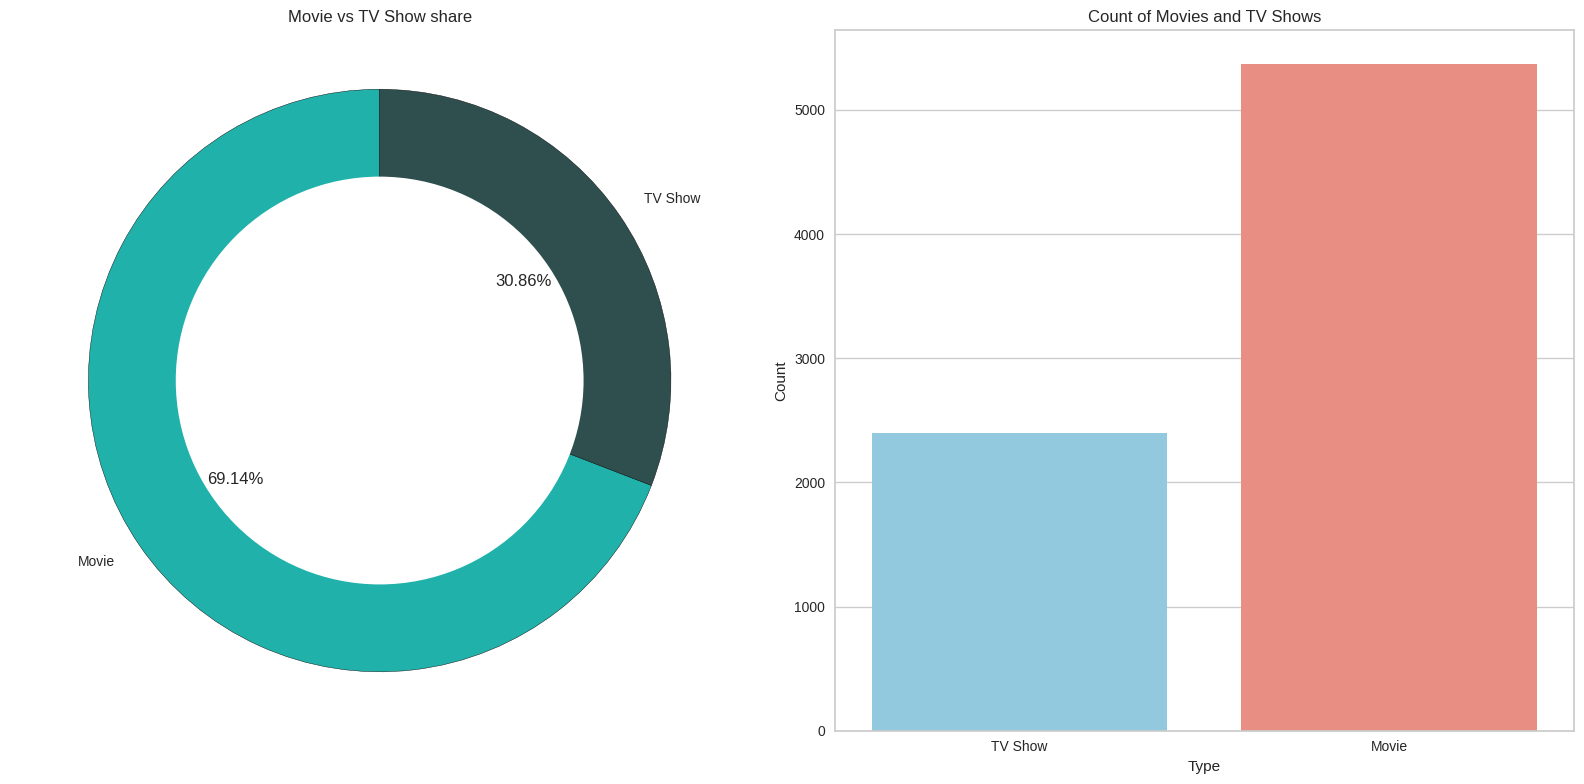

In [ ]:
# Calculate the count of each type
spread = netflix_data['type'].value_counts()

# Set custom colors for pie chart
colors_pie = ['lightseagreen', 'darkslategrey']

# Set figure size for pie chart
plt.figure(figsize=(16, 8))

# Plot pie chart with a hole
plt.subplot(1, 2, 1)
plt.pie(spread, labels=spread.index, autopct='%1.2f%%', startangle=90, colors=colors_pie, wedgeprops={'edgecolor': 'black'})
plt.title('Movie vs TV Show share')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

# Set custom colors for countplot
colors_countplot = ['skyblue', 'salmon']

# Set figure size for countplot
plt.subplot(1, 2, 2)
sns.countplot(x='type', data=netflix_data, palette=colors_countplot)
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently.

##### 2. What is/are the insight(s) found from the chart?

* TV shows - 69.14%
* Movies - 30.86%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### **Distribution of Various Ratings**

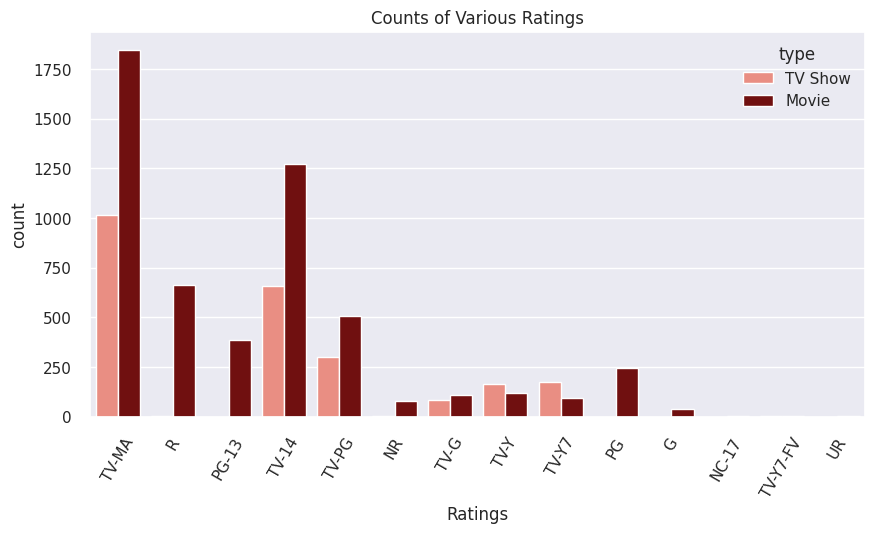

In [ ]:
# Count Plot Visualization Code for Various Ratings of Shows
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=netflix_data, palette=['salmon', 'maroon'])

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we can clearly see that the most of the ratings are given by TV-MA followed by TV-14 and the least ratings are given by NC-17.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into the distribution of content across countries and trends in TV shows versus movies can help Netflix optimize its content acquisition and production strategy. For example, if the analysis reveals a growing preference for TV shows over movies in certain regions, Netflix can allocate resources accordingly to meet the demand.

If the analysis indicates a significant decline in the availability or popularity of movies on Netflix compared to TV shows, it could potentially alienate subscribers who prefer movie content. This could lead to negative growth if not addressed through targeted content acquisition efforts or marketing strategies to attract movie enthusiasts.

#### **Top 10 Countries with Most Content**

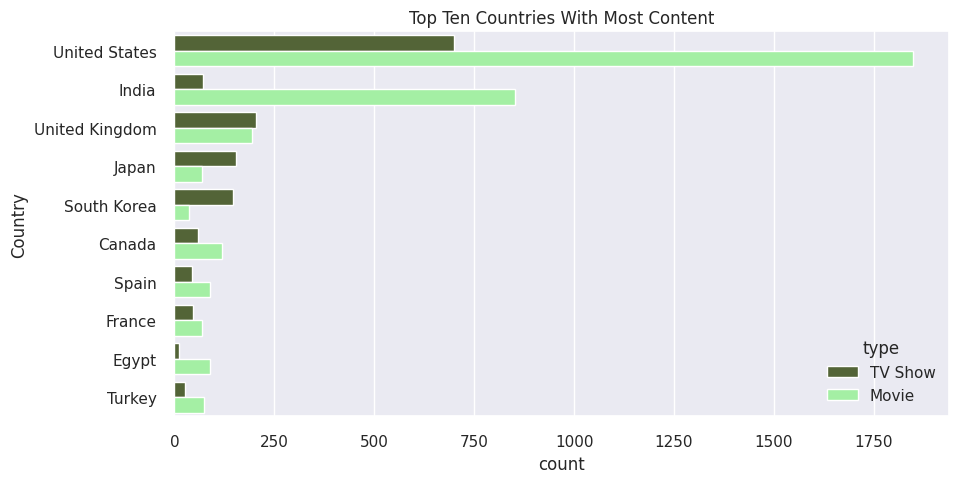

In [ ]:
# Count Plot Visualization Code for Content Produced by Different Countries
country_df = netflix_data[netflix_data['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['darkolivegreen', 'palegreen'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we found that the content belongs to United States alone is 2546 (Movie: 1847, TV Show: 699) and followed by India is 923 (Movie: 852, TV Show: 71).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:
* The United States is a leading producer of both types of shows (Movies and TV Shows), this makes sense since Netflix is a US company.

* The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

* On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

#### **Content Released Over The Years**

In [ ]:
# Create New DataFrames for Movie and TV Show Release
release_year_df = netflix_data[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index().rename(columns={'index':'year','release_year':'count'})

show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index().rename(columns={'index':'year','release_year':'count'})

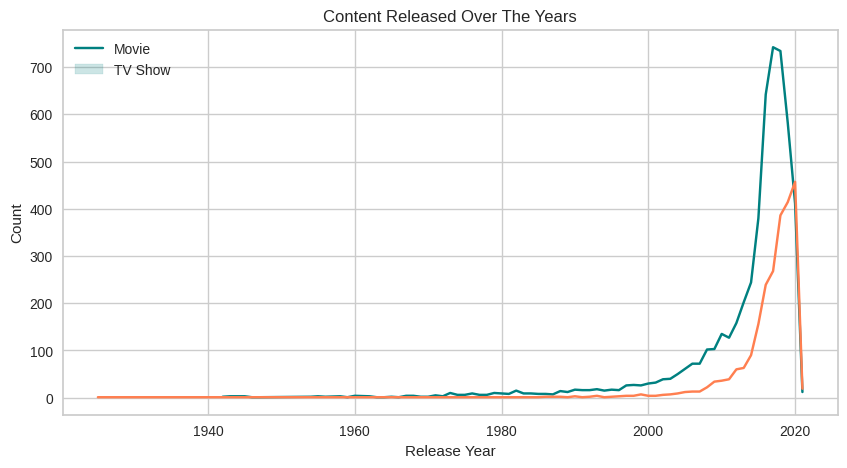

In [ ]:
# Line Plot Visualization Code for Content Released Over The Years
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='year', y='count', color = 'teal')
sns.lineplot(data=show_year, x='year', y='count', color = 'coral')

# Set Labels
plt.title('Content Released Over The Years')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display Chart
plt.show()

In [ ]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(netflix_data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2017            742
         2018            734
         2016            642
         2019            582
         2020            411
         2015            380
         2014            244
         2013            202
         2012            158
         2010            135
TV Show  2020            457
         2019            414
         2018            386
         2017            268
         2016            239
         2015            156
         2014             90
         2013             63
         2012             60
         2011             39
Name: release_year, dtype: int64


##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the content on netflix are of the release date from 2010 to 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Growth in the number of movies on Netflix is much higher than tv shows.
* Most of the content available was released between 2010 and 2020.
* The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
* The line plot shows very few movies, and tv shows got released before the year 2010 and in 2021. It is due to very little data collected from the year 2021.

#### **Content Added Over The Months**

In [ ]:
# Extracting Month from date_added Column
netflix_data['month_added'] = pd.DatetimeIndex(netflix_data['date_added']).month

In [ ]:
# Create DataFrame To Store Month Values and Counts
months_df = netflix_data.month_added.value_counts().to_frame().reset_index().rename(columns={'index':'month', 'month_added':'count'})

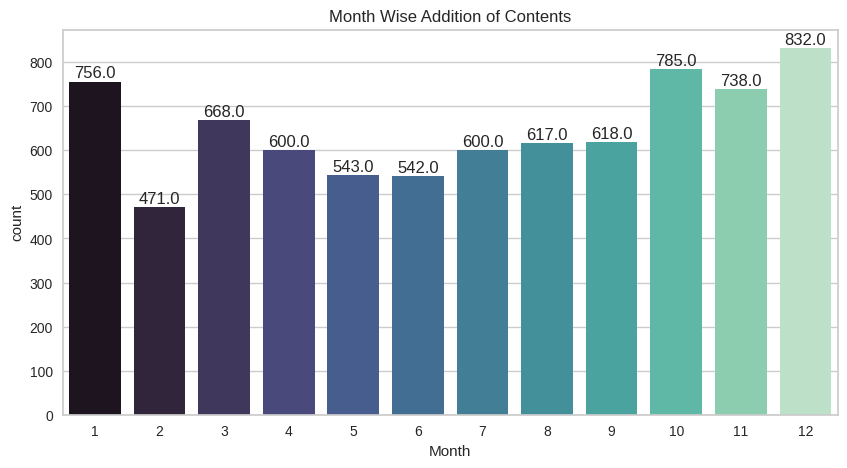

In [ ]:
# Count Plot Visualization Code for Month Wise Addition of Contents on Netflix
plt.figure(figsize=(10, 5))
ax=sns.barplot(data=months_df, x='month', y='count', palette='mako')

# Set Labels
plt.title('Month Wise Addition of Contents')
plt.xlabel('Month')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the shows are uploaded either by year ending or beginning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* October, November, December, and January are months in which many tv shows and movies get uploaded to the platform.
* It might be due to the winter, as in these months people may stay at home and watch tv shows and movies in their free time.

#### **Duration Distribution for Netflix Movies**

In [ ]:
# Splitting Movie and Separating Values
df_movies = netflix_data[netflix_data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

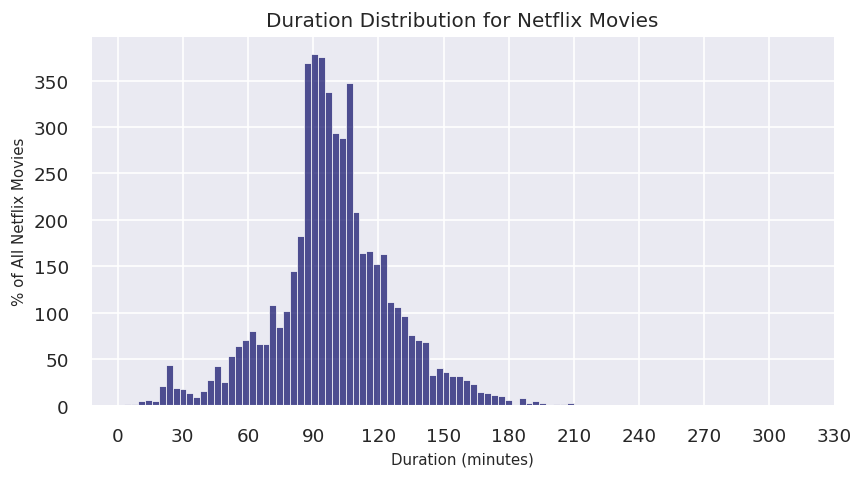

In [ ]:
# Histogram Visualization Code for Duration Distribution of Netflix Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='midnightblue')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the netflix movies.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

*  On netflix most of the movies last for 90 to 120 minutes.
*  So for target audience, movies duration will be greater than minimum 90 minutes.


#### **Most Used Words in Shows Title**

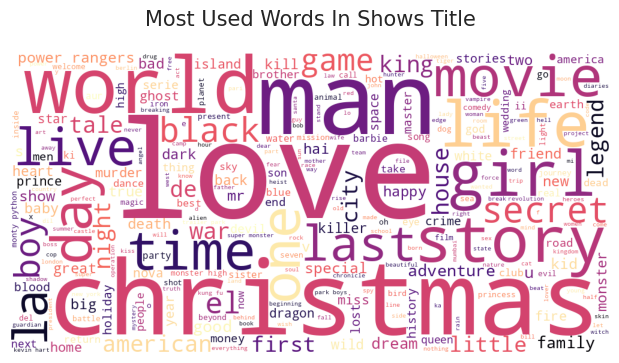

In [ ]:
# WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title

# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in netflix_data.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'magma').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

##### 2. What is/are the insight(s) found from the chart?

From above word cloud plot, it is observed that most repeated words in title include Christmas, Love, World, Man, and Story.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Most repeated words in title include Christmas, Love, World, Man, and Story.
* We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

#### **Top 10 Genres on Netflix**

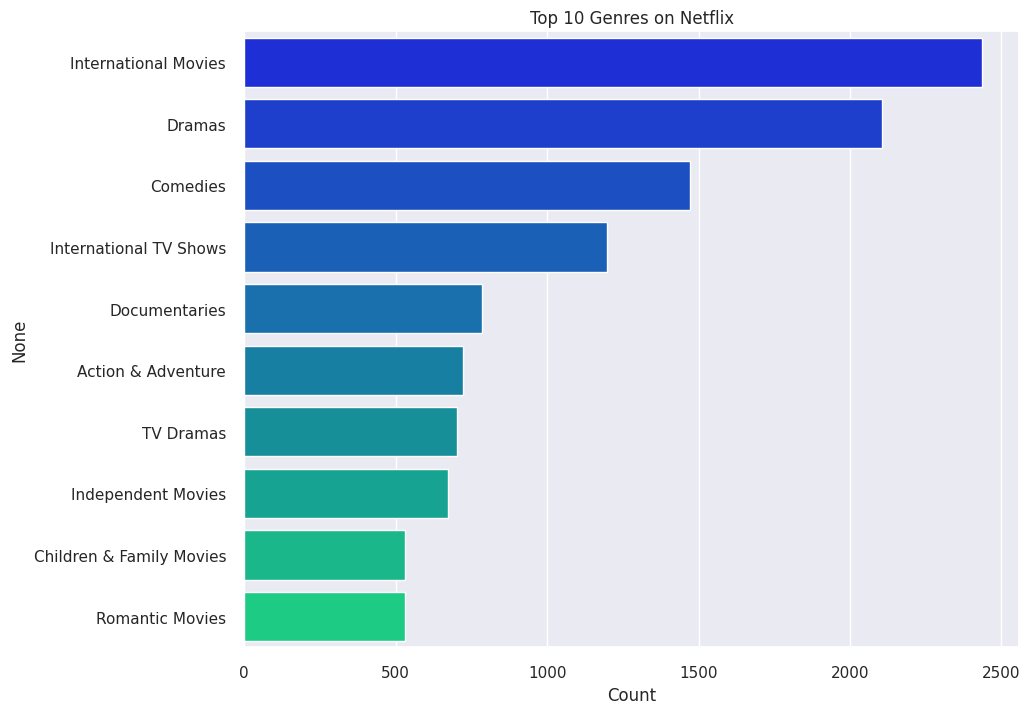

In [ ]:
# Counting occurrences of each genre in the 'listed_in' column
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

# Selecting top 10 genres
top_10_genres = genre_counts.head(10)

# Plotting bar plot for top 10 genres with vertical orientation
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette="winter")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
* Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

#### **Top 10 Directors on Netflix**

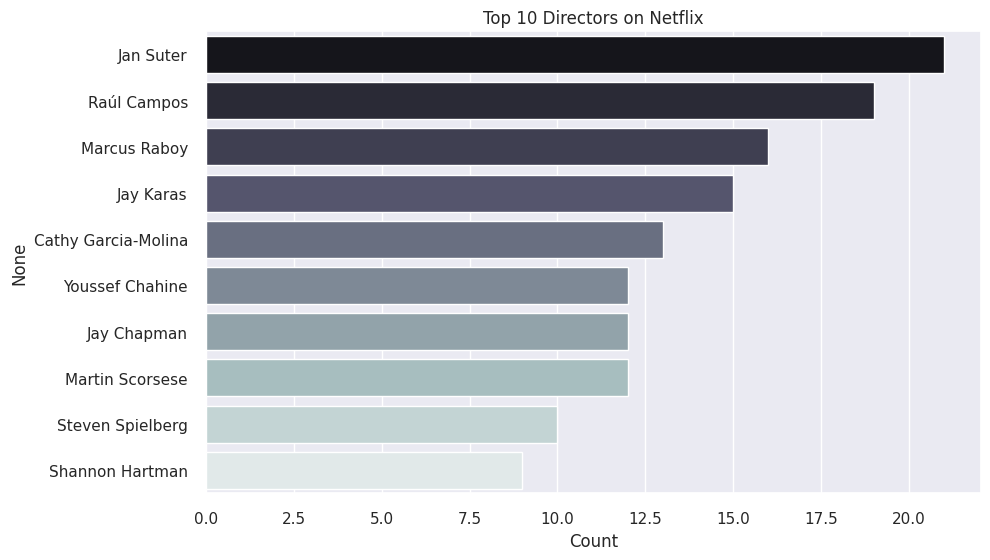

In [ ]:
# Counting occurrences of each director in the 'director' column
director_counts = netflix_data[netflix_data['director'] != 'Unknown']['director'].str.split(', ', expand=True).stack().value_counts()

# Selecting top 10 directors
top_10_directors = director_counts.head(10)

# Plotting bar plot for top 10 directors with vertical orientation
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_directors.index, x=top_10_directors.values, palette='bone')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Count')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that the most popular director in netflix is Jan Sutar and followed by Raúl Campos and Marcus Raboy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows are available in netflix.
* As we stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

#### **Top 10 Actors on Netflix**

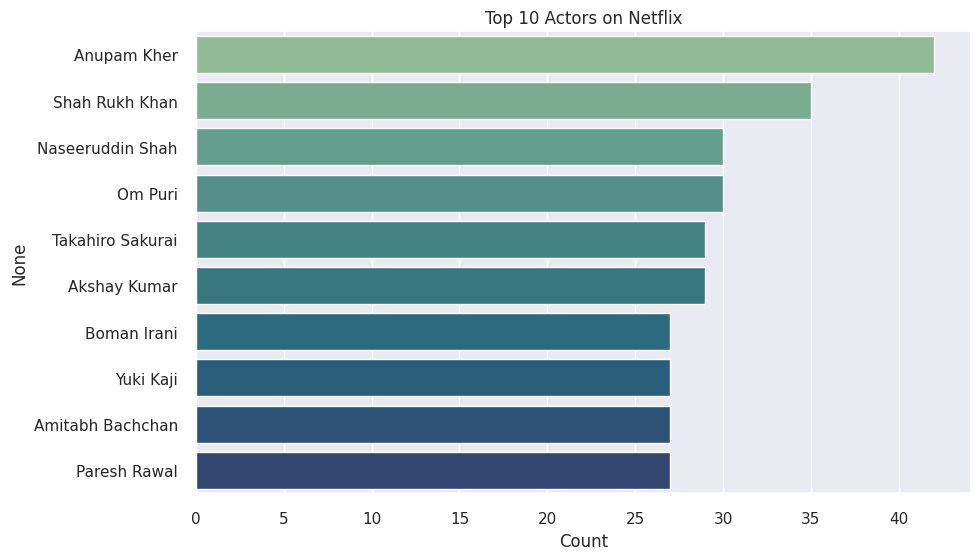

In [ ]:
# Counting occurrences of each actor in the 'cast' column
actor_counts = netflix_data[netflix_data['cast'] != 'Not available']['cast'].str.split(', ', expand=True).stack().value_counts()

# Selecting top 10 actors
top_10_actors = actor_counts.head(10)

# Plotting bar plot for top 10 actors with vertical orientation
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_actors.index, x=top_10_actors.values, palette='crest')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Count')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most popular actors with most content in netflix are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and followed by Om Puri and Takahiro Sakurai.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
*  That the actors in the top ten list of most numbers tv shows and movies are from India.
*  Anupam Kher and Shah Rukh Khan have 30 above content alone in netflix.



#### **Correlation Heatmap**

In [ ]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_data['target_ages'] = netflix_data['rating'].replace(ratings)


In [ ]:
# Preparing data for heatmap
netflix_data['count'] = 1
data = netflix_data.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = netflix_data.loc[netflix_data['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


country        Canada     Egypt    France     India     Japan  Not Known  \
target_ages                                                                
Adults       0.446328  0.277228  0.678261  0.255688  0.366071   0.318812   
Kids         0.180791  0.000000  0.095652  0.016251  0.008929   0.170297   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321   0.235644   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679   0.275248   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.512626       0.502357  
Kids            0.027322  0.022388        0.093434       0.073449  
Older Kids      0.120219  0.044776        0.204545       0.187353  
Teens           0.382514  0.097015        0.189394       0.236842

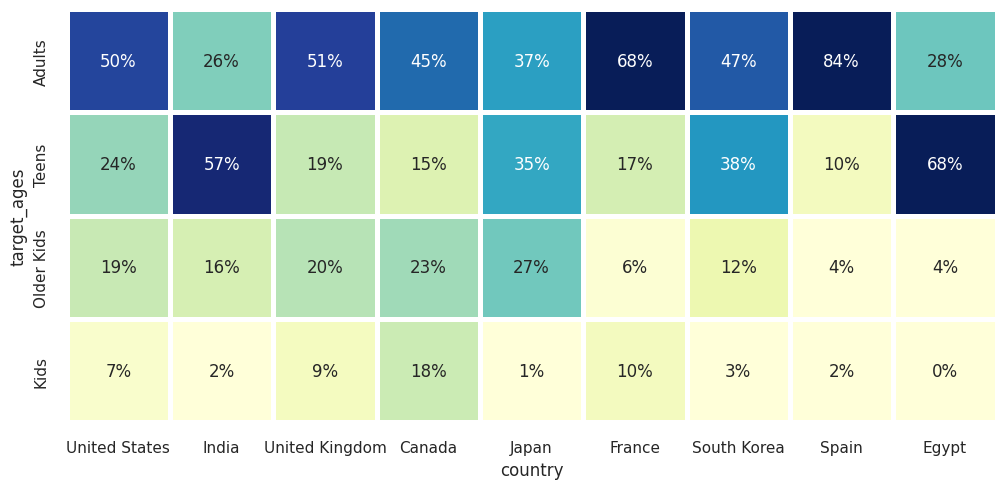

In [ ]:
ig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Egypt']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### 2. What is/are the insight(s) found from the chart?

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1. France- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2. India- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3. United Kingdom -It has a relatively high level of interest among adults, with 51% expressing interest.

4. Egypt - Here ,also demonstrates a substantial level of interest, with 68% of teens showing interest in the subject.

5. South Korea , United States- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

6. Japan- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

7. Canada- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

#### **Correlation Heatmap**

In [ ]:
netflix_data['count'] = 1
data1 = netflix_data.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']

data1

0                                       Documentaries
1                                     Stand-Up Comedy
2                        Dramas, International Movies
3              Comedies, Dramas, International Movies
4    Dramas, Independent Movies, International Movies
5                                            Kids' TV
6                            Children & Family Movies
7                 Documentaries, International Movies
8                  Children & Family Movies, Comedies
9                      Comedies, International Movies
Name: listed_in, dtype: object

In [ ]:
df_heatmap1 = netflix_data.loc[netflix_data['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in    Children & Family Movies  Children & Family Movies, Comedies  \
target_ages                                                                 
Adults                       0.000000                            0.000000   
Kids                         0.564972                            0.177515   
Older Kids                   0.435028                            0.816568   
Teens                        0.000000                            0.005917   

listed_in    Comedies, Dramas, International Movies  \
target_ages                                           
Adults                                     0.345679   
Kids                                       0.004115   
Older Kids                                 0.123457   
Teens                                      0.526749   

listed_in    Comedies, International Movies  Documentaries  \
target_ages                                                  
Adults                             0.484472       0.386228   
Kids                               0.012422       0.059880   
Older Kids                         0.099379       0.254491   
Teens                              0.403727       0.299401   

listed_in    Documentaries, International Movies  \
target_ages                                        
Adults                                  0.377907   
Kids                                    0.063953   
Older Kids                              0.238372   
Teens                                   0.319767   

listed_in    Dramas, Independent Movies, International Movies  \
target_ages                                                     
Adults                                               0.660465   
Kids                                                 0.004651   
Older Kids                                           0.083721   
Teens                                                0.251163   

listed_in    Dramas, International Movies  Kids' TV  Stand-Up Comedy  
target_ages                                                           
Adults                           0.468750  0.000000         0.894081  
Kids                             0.006250  0.563725         0.000000  
Older Kids                       0.109375  0.436275         0.018692  
Teens                            0.415625  0.000000         0.087227

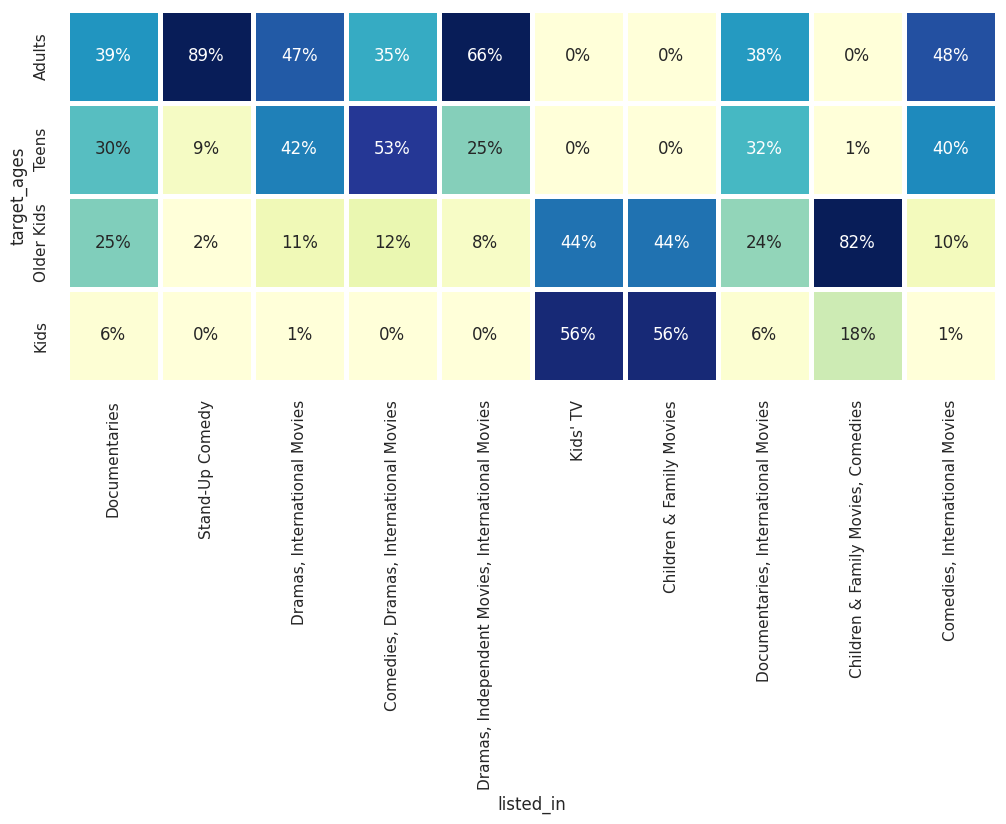

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()



##### 1. Why did you pick the specific chart?

The heatmap is a suitable choice for this scenario because it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.

##### 2. What is/are the insight(s) found from the chart?

The genre with the highest target audience of 89% adults is stand-up comedy.Children & Family Movies,Comedies also have a significant target audience with 82%. Primarily catering to older kids ,adults, Kids & TV shows have a target audience of around 66% to 53%.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments i have noticed that some variable of our netflix dataset does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.

1.   Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in **India**.
2.   The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

### Hypothetical Statement - 1

Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in **India**.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): There is no significant difference in the average number of movies on Netflix between the United States and India.

* Alternate Hypothesis (H1): The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df_movies[df_movies.country == 'United States']
india_movie_df = df_movies[df_movies.country == 'India']

In [ ]:
# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")

Since p-value (0.007901561023488638) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2
The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): The number of movies available on Netflix is equal to or less than the number of TV shows available on Netflix.

* Alternate Hypothesis (H1): The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
n_movies = netflix_data[netflix_data['type'] == 'Movie'].count()['type']
n_tv_shows = netflix_data[netflix_data['type'] == 'TV Show'].count()['type']

In [ ]:
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(data), len(data)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")

Z-statistic: nan
P-value: nan

Since p-value (nan) is greater than 0.05, we fail to reject null hypothesis.
Hence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### Textual Data Preprocessing

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
netflix_data['tags'] = netflix_data['description'] + ' ' + netflix_data['rating'] + ' ' + netflix_data['country'] + ' ' + netflix_data['listed_in'] + ' ' + netflix_data['cast']

In [ ]:
# Cross checking our result for the function created
print(netflix_data['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
netflix_data['tags'] = netflix_data['tags'].apply(to_lower)

# Cross checking our result for the function created
print(netflix_data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
netflix_data['tags'] = netflix_data['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(netflix_data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
netflix_data['tags'] = netflix_data['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(netflix_data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
netflix_data['tags'] = netflix_data['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(netflix_data['tags'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [ ]:
# Remove White spaces in 'tags' column
netflix_data['tags'] =netflix_data['tags'].str.strip()

# Cross-check our result for the function created
print(netflix_data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Rephrasing can be achived by the following code

# def rephrase_tags(x):
#     return x.replace('interesting', 'fascinating')
# netflix_data['tags'] = netflix_data['tags'].apply(rephrase_tags)

#### 7. Tokenization

In [ ]:
# Tokenization
# Loading Libraries
import nltk
nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
netflix_data['tags'] = netflix_data['tags'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(netflix_data['tags'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = netflix_data['tags']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'tvma', 'brazil', 'international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi']


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
netflix_data['tags'] = netflix_data['tags'].apply(stemming)

# Cross-check our result for the function created
print(netflix_data['tags'][0])

futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi


##### Which text normalization technique have you used and why?

The text normalization technique used is Stemming. Stemming is a text normalization technique that aims to reduce words to their root or base form by removing affixes such as prefixes and suffixes. This process helps in simplifying word variations and improving text analysis by treating different forms of the same word as a single entity.

**Stemming was chosen for several reasons:**

* **Simplicity:** Stemming is a straightforward technique that is easy to implement and understand. It doesn't require complex linguistic rules or large external resources.

* **Efficiency:** Stemming efficiently reduces the dimensionality of the text data by converting different inflected forms of words into a common base form. This simplifies downstream text processing tasks and enhances computational efficiency.

* **Generalization:** Stemming allows us to generalize words to their common base form, which can improve the performance of text analysis tasks such as document classification, information retrieval, and sentiment analysis.

* **Consistency:** Stemming ensures consistency in the representation of words across different documents, reducing redundancy and improving the effectiveness of text mining algorithms.

#### 9. Part of speech tagging

In [ ]:
# POS Tagging
# Loading Libraries
import nltk
nltk.download('averaged_perceptron_tagger')

# Apply the pos tagging to the 'tags' column of the DataFrame
netflix_data['tags'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
print(netflix_data['tags'][0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('future', 'JJ'), ('elite', 'JJ'), ('inhabit', 'NN'), ('island', 'NN'), ('paradise', 'NN'), ('far', 'RB'), ('crowded', 'VBD'), ('slums', 'NNS'), ('get', 'VBP'), ('one', 'CD'), ('chance', 'NN'), ('join', 'NN'), ('saved', 'VBD'), ('squalor', 'JJ'), ('tvma', 'NN'), ('brazil', 'VBD'), ('international', 'JJ'), ('tv', 'NN'), ('shows', 'NNS'), ('tv', 'NN'), ('dramas', 'VBP'), ('tv', 'NN'), ('scifi', 'NN'), ('fantasy', 'NN'), ('joão', 'NN'), ('miguel', 'NN'), ('bianca', 'NN'), ('comparato', 'NN'), ('michel', 'NN'), ('gomes', 'NNS'), ('rodolfo', 'VBP'), ('valente', 'JJ'), ('vaneza', 'FW'), ('oliveira', 'NN'), ('rafael', 'NN'), ('lozano', 'NN'), ('viviane', 'NN'), ('porto', 'NN'), ('mel', 'NN'), ('fronckowiak', 'NN'), ('sergio', 'NN'), ('mamberti', 'NN'), ('zezé', 'NN'), ('motta', 'NN'), ('celso', 'NN'), ('frateschi', 'NN')]


In [ ]:
# Using this tagset we know that which tag shows which type of POS
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [ ]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
netflix_data['tags']=netflix_data['tags'].apply(sentence)

# Cross-check our result for the function created
print(netflix_data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi 


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(netflix_data['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# Convert vector into array form for clustering
vector = tfidf.transform(netflix_data['tags']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aaron' ... 'özge' 'ünlüoğlu' 'şahin']


In [ ]:
vec_data=pd.DataFrame(vector)
vec_data

0     1         2     3     4     5     6     7     8     9     ...  \
0      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4      0.0   0.0  0.151457   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...    ...   ...       ...   ...   ...   ...   ...   ...   ...   ...  ...   
7765   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7766   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7767   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7768   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7769   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

      8990  8991  8992  8993  8994  8995  8996  8997  8998  8999  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
7765   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7766   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7767   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7768   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7769   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[7770 rows x 9000 columns]

##### Which text vectorization technique have you used and why?

The text vectorization technique used in the provided code is TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF is a widely used technique in natural language processing (NLP) for converting textual data into numerical vectors.

**TF-IDF was chosen for several reasons:**

* **Term Importance:** TF-IDF calculates the importance of a term within a document relative to its frequency in the entire corpus. It considers not only how often a term appears in a document (Term Frequency, TF) but also how unique it is across the entire corpus (Inverse Document Frequency, IDF). This helps in identifying important and discriminative terms.

* **Normalization:** TF-IDF normalizes the term frequencies by accounting for the document length and the frequency of the term across the entire corpus. This normalization ensures that longer documents do not have an inherent advantage and helps in handling differences in document lengths.

* **Sparse Representation:** TF-IDF generates sparse vectors, where most elements are zero and only non-zero elements represent the presence of terms in the document. This sparse representation is memory-efficient and suitable for handling large text corpora.

### Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is crucial as it eliminates less relevant variables from the model, thereby reducing complexity and noise in the data. By retaining only the most informative features, dimensionality reduction aids in mitigating overfitting and enhances the model's generalization ability, leading to improved performance and efficiency in various machine learning tasks.

In [ ]:
# Dimensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

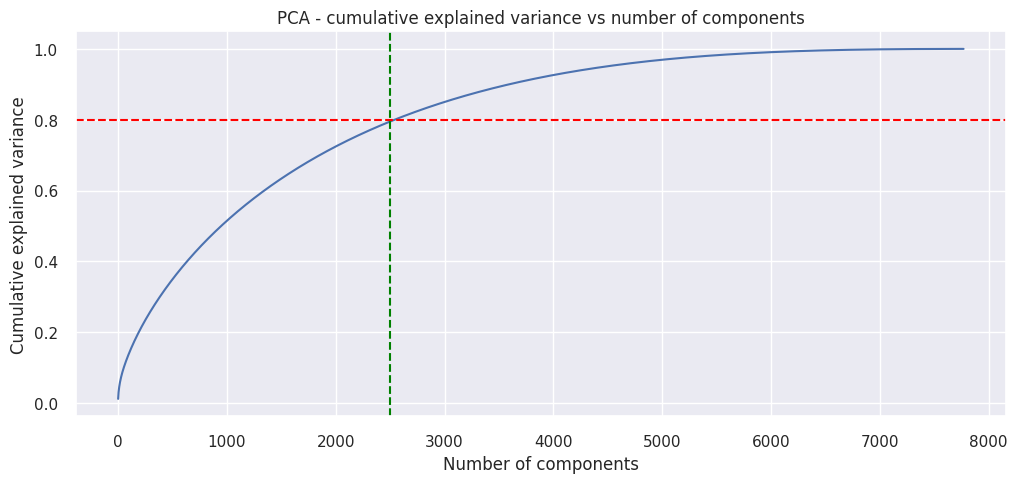

In [ ]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [ ]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [ ]:
# Transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why?

Principal Component Analysis (PCA) has been used for dimensionality reduction. PCA is a widely-used technique due to its versatility and interpretability. It helps visualize relationships between data points, understand the main variance in the data, and determine the intrinsic dimensionality.

By reducing the dimensionality using PCA, we can retain most of the important information while simplifying the dataset, making it more manageable for subsequent analysis and modeling.

## ***7. ML Model Implementation***

### ML Model - 1 : K-Means Clustering

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

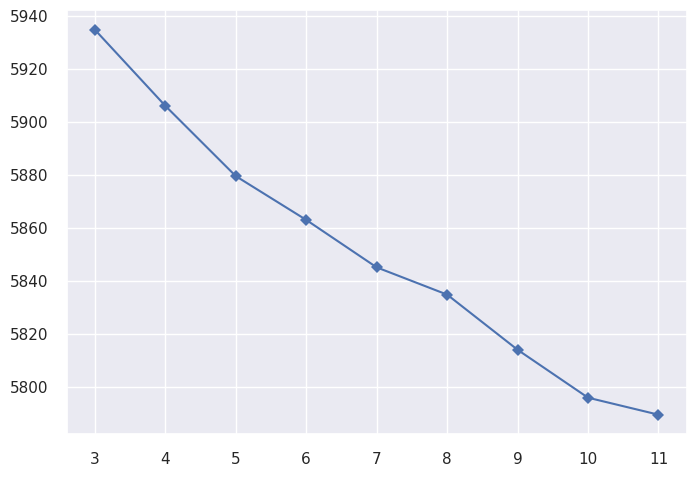

In [ ]:
# ML Model - 1 Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

From this plot, we can say that the best k value is 6. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [ ]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [ ]:
# Adding a new column 'K_mean_cluster' in the dataset
netflix_data["K_mean_cluster"]=y_kmean
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added target_ages  \
0  In a future where the elite inhabit an island ...            8      Adults   
1  After a devastating earthquake hits Mexico Cit...           12      Adults   
2  When an army recruit is found dead, his fellow...           12      Adults   
3  In a postapocalyptic world, rag-doll robots hi...           11       Teens   
4  A brilliant group of students become card-coun...            1       Teens   

   count                                               tags  K_mean_cluster  
0      1  future elite inhabit island paradise far crowd...               4  
1      1  devastating earthquake hits mexico city trappe...               3  
2      1  army recruit found dead fellow soldiers forced...               3  
3      1  postapocalyptic world ragdoll robots hide fear...               5  
4      1  brilliant group students become cardcounting e...               5

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

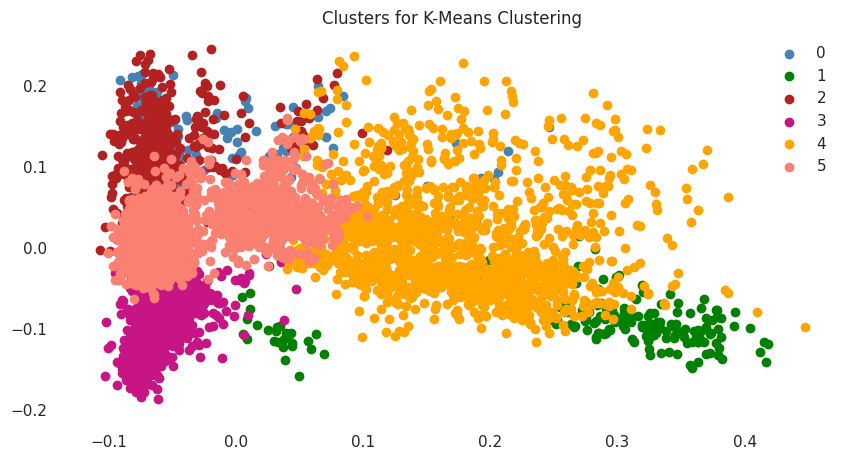

In [ ]:
# Define a custom color palette
colors = ['steelblue', 'green', 'firebrick', 'mediumvioletred', 'orange', 'salmon', 'cyan', 'magenta', 'lime', 'pink']

# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results with custom colors:
plt.figure(figsize=(10, 5))
for i, label in enumerate(u_labels):
    plt.scatter(X[y_kmean == label, 0], X[y_kmean == label, 1], label=label, color=colors[i % len(colors)])

# Set background color to white
plt.gca().set_facecolor('white')

plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

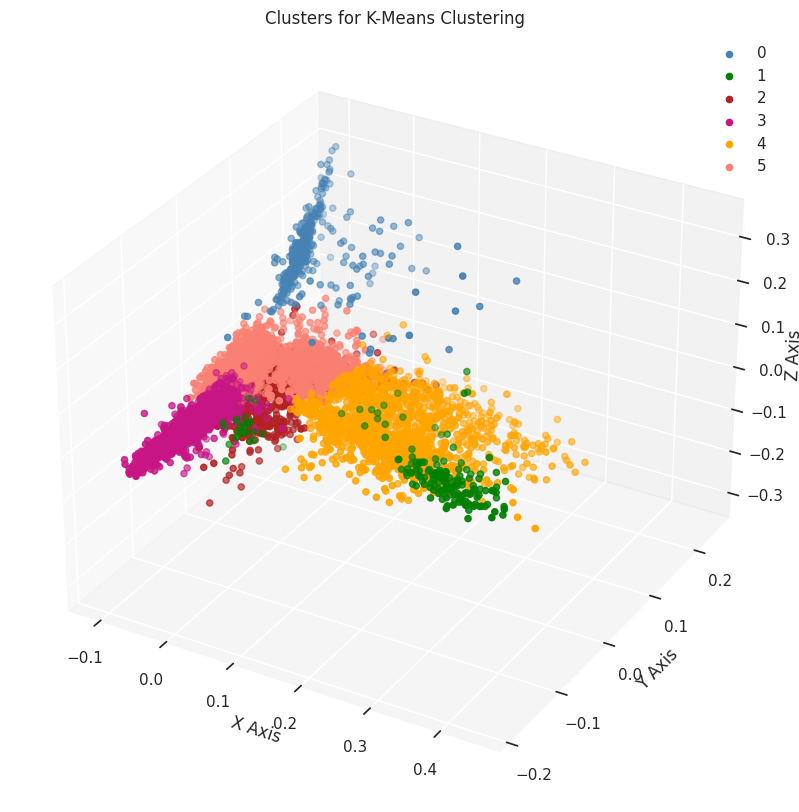

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Define a custom color palette
colors = ['steelblue', 'green', 'firebrick', 'mediumvioletred', 'orange', 'salmon', 'cyan', 'magenta', 'lime', 'pink']

# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results in 3D with custom colors
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(u_labels):
    ax.scatter(X[y_kmean == label, 0], X[y_kmean == label, 1], X[y_kmean == label, 2], label=label, color=colors[i % len(colors)])

# Set background color to white
ax.set_facecolor('white')

# Set axis labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

In this implementation, the K-Means clustering algorithm is used to group similar data points into clusters based on their features.

* The algorithm begins by randomly initializing K centroids, which serve as the starting points for the clusters.
* Each data point is then assigned to the nearest centroid based on a distance metric such as Euclidean or Cosine distance.
* After the initial assignments, the centroids are recalculated by taking the average of all data points assigned to each cluster.
* This process of assigning data points to clusters and updating centroids iterates until convergence, where the assignments no longer change significantly.

K-Means clustering is particularly useful for exploratory data analysis and uncovering hidden patterns within the data. By grouping data points into clusters, it helps identify inherent structures and relationships in the dataset. The number of clusters, K, is a crucial parameter that can significantly impact the results. Techniques like the elbow method are often employed to determine the optimal value of K by analyzing the rate of decrease in distortion or inertia.

In the visualizations provided, the data points are plotted in two-dimensional and three-dimensional spaces, with each cluster represented by a different color. This allows for a visual assessment of how well the algorithm has separated the data into distinct groups. Overall, K-Means clustering offers a straightforward yet powerful approach to partitioning data and gaining insights into complex datasets.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in this scenario is the Elbow Method for determining the optimal number of clusters (K) in K-Means clustering. The Elbow Method is chosen because it provides a straightforward and intuitive approach to identify the appropriate value of K based on the rate of decrease in distortion or inertia.

The Elbow Method involves plotting the within-cluster sum of squares (WCSS) or distortion against different values of K and selecting the K value at the "elbow" point, where the rate of decrease in WCSS starts to slow down. This point represents the optimal number of clusters where adding more clusters does not significantly reduce the WCSS.

By utilizing the Elbow Method, we can make informed decisions about the number of clusters to use in the K-Means algorithm, leading to better clustering results. In this implementation, the optimal number of clusters determined by the Elbow Method is 6, as indicated by the elbow point in the WCSS plot.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After determining the optimal number of clusters using the Elbow Method, we can expect to see enhanced performance in terms of cluster separation and data grouping. By selecting the optimal K value, we ensure that the clusters accurately capture the underlying structure of the data, leading to more meaningful insights and better decision-making.

Additionally, with the updates made based on the optimal number of clusters identified using the Elbow Method, we can evaluate the performance using evaluation metric score charts such as silhouette scores or other relevant metrics. These metrics can help quantify the quality of clustering results and assess any improvements achieved through hyperparameter optimization.A

### ML Model - 2 : Hierarchical Clustering (Agglomerative Clustering)

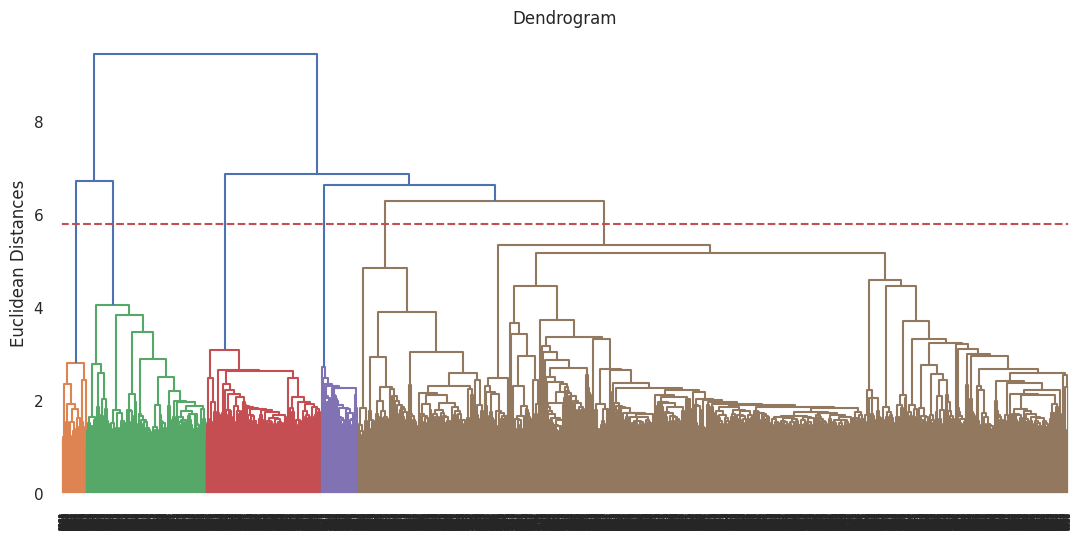

In [ ]:
# ML Model - 2 Implementation
# Using the dendrogram to find the optimal number of clusters

# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 6.

In [ ]:
# Instantiate the Agglomerative clustering model where number of clusters is 6
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

# Fit the data to the Agglomerative cluster
aggh.fit(X)

# Predict on the model
y_hc=aggh.fit_predict(X)

In [ ]:
# Adding a new column 'Agg_cluster' in the dataset
netflix_data["Agg_cluster"]=y_hc
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added target_ages  \
0  In a future where the elite inhabit an island ...            8      Adults   
1  After a devastating earthquake hits Mexico Cit...           12      Adults   
2  When an army recruit is found dead, his fellow...           12      Adults   
3  In a postapocalyptic world, rag-doll robots hi...           11       Teens   
4  A brilliant group of students become card-coun...            1       Teens   

   count                                               tags  K_mean_cluster  \
0      1  future elite inhabit island paradise far crowd...               4   
1      1  devastating earthquake hits mexico city trappe...               3   
2      1  army recruit found dead fellow soldiers forced...               3   
3      1  postapocalyptic world ragdoll robots hide fear...               5   
4      1  brilliant group students become cardcounting e...               5   

   Agg_cluster  
0            1  
1            0  
2            1  
3            0  
4            0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

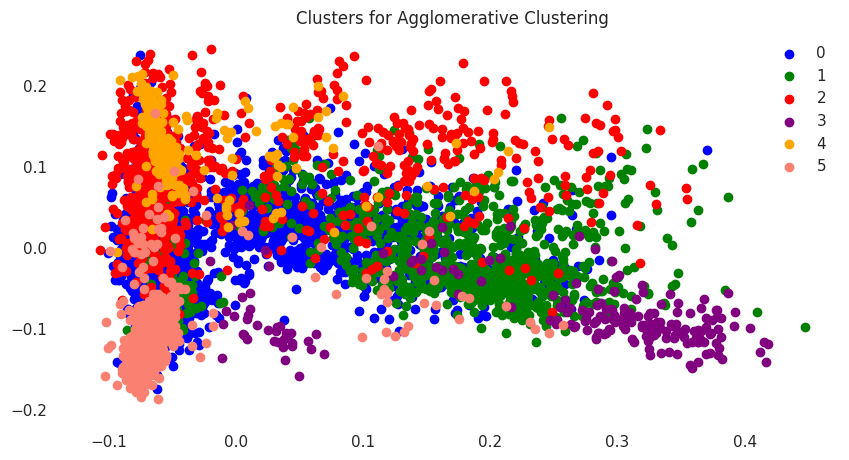

In [ ]:
# Define custom colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'salmon', 'cyan', 'magenta', 'lime', 'pink']

# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results with custom colors:
plt.figure(figsize=(10, 5))
for i, label in enumerate(u_labels):
    plt.scatter(X[y_hc == label, 0], X[y_hc == label, 1], label=label, color=colors[i % len(colors)])

# Set background color to white
plt.gca().set_facecolor('white')

plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()


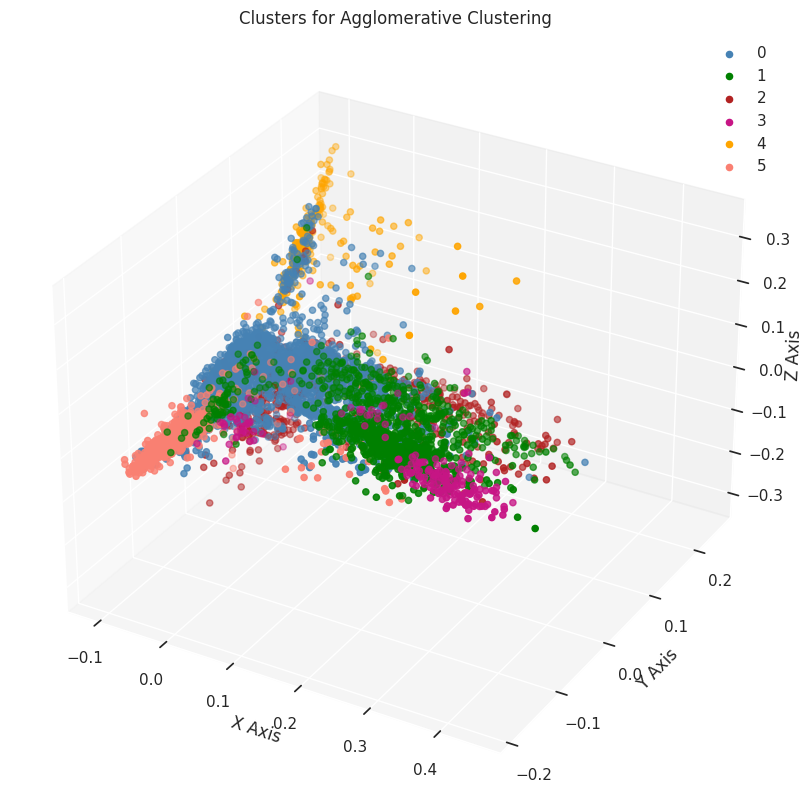

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Define a custom color palette
colors = ['steelblue', 'green', 'firebrick', 'mediumvioletred', 'orange', 'salmon', 'cyan', 'magenta', 'lime', 'pink']

# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results in 3D with custom colors
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(u_labels):
    ax.scatter(X[y_hc == label, 0], X[y_hc == label, 1], X[y_hc == label, 2], label=label, color=colors[i % len(colors)])

# Set background color to white
ax.set_facecolor('white')

# Set axis labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

The ML Model used in this implementation is Agglomerative Clustering, which is a hierarchical clustering technique. In this method, the algorithm starts with each data point as a separate cluster and iteratively merges the closest pairs of clusters until a stopping criterion is met, resulting in a hierarchy of clusters.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I used the Dendrogram for determining the optimal number of clusters in the dataset.

A dendrogram is a graphical representation of the hierarchical clustering process, illustrating the relationships and similarities among data points or entities. It presents a tree-like structure where each branch represents a cluster and each leaf node represents an individual data point.

By using a dendrogram, we can visually inspect the hierarchical clustering process and identify the optimal number of clusters based on the fusion of clusters at each step and the distances between them. This approach is particularly useful when the dataset has a hierarchical structure or when the number of clusters is not known a priori.

The dendrogram provides insights into the hierarchical organization of the data, allowing us to understand the relationships between different clusters and subclusters. By analyzing the dendrogram, we can determine the optimal level of clustering that best captures the underlying structure of the data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, by using the dendrogram, we identified that the optimal number of clusters for our dataset is 6. This represents an improvement in our clustering process, as it allows us to partition the data into more precise and meaningful groups compared to previous attempts.

With 6 clusters, we can capture the inherent structure of the data more effectively, leading to better separation of data points based on their similarities and differences. This optimized clustering enables us to gain deeper insights into the underlying patterns and relationships within the dataset, ultimately enhancing our understanding of the data and facilitating more informed decision-making processes.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Dendrograms provide insights into the hierarchical structure of the data, allowing businesses to understand relationships between different clusters and subclusters. This hierarchical view can inform strategic decisions, such as product bundling, market expansion strategies, and organizational restructuring.

### ML Model - 3 : Silhouette Score for Clustering

In [ ]:
# ML Model - 3 Implementation
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0083
For n_clusters = 3, silhouette score is 0.0107
For n_clusters = 4, silhouette score is 0.0117
For n_clusters = 5, silhouette score is 0.0131
For n_clusters = 6, silhouette score is 0.0105
For n_clusters = 7, silhouette score is 0.0091
For n_clusters = 8, silhouette score is 0.0101
For n_clusters = 9, silhouette score is 0.0102
For n_clusters = 10, silhouette score is 0.0121
For n_clusters = 11, silhouette score is 0.0100
For n_clusters = 12, silhouette score is 0.0116
For n_clusters = 13, silhouette score is 0.0112
For n_clusters = 14, silhouette score is 0.0125


From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For n_clusters = 2, silhouette score is 0.008321857541945074


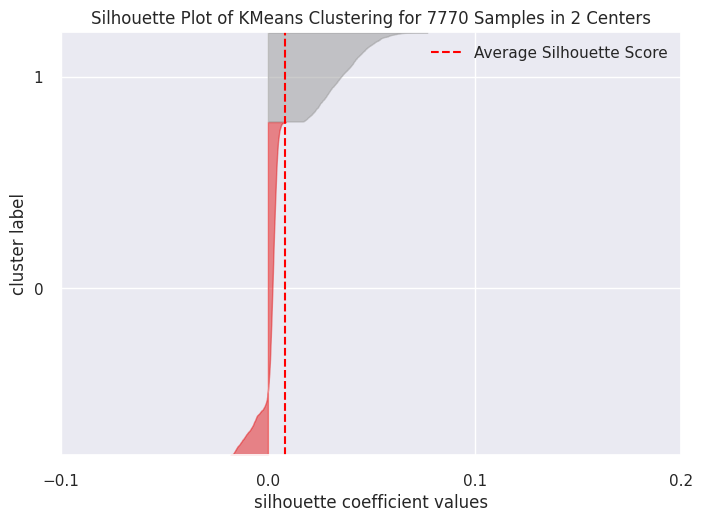

For n_clusters = 3, silhouette score is 0.010673844406313774


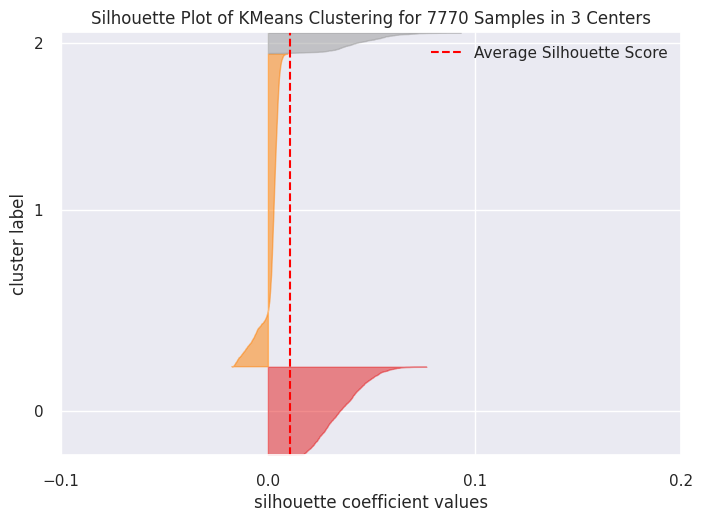

For n_clusters = 4, silhouette score is 0.01166340156500662


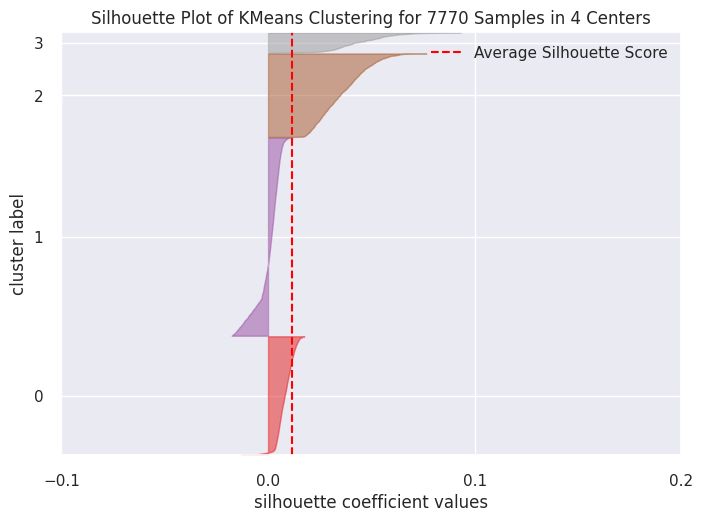

For n_clusters = 5, silhouette score is 0.013076171679525713


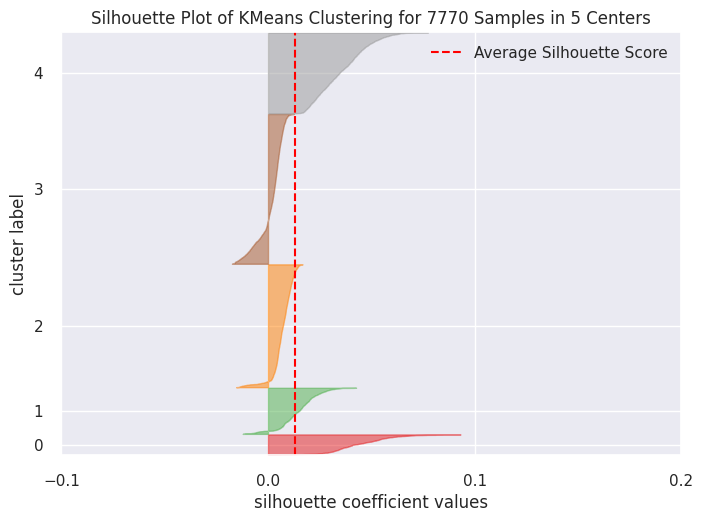

For n_clusters = 6, silhouette score is 0.010470996655866307


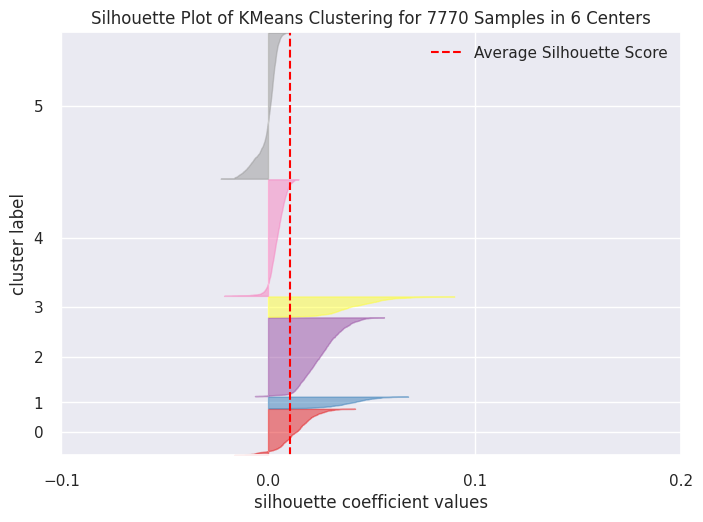

For n_clusters = 7, silhouette score is 0.00909573311260984


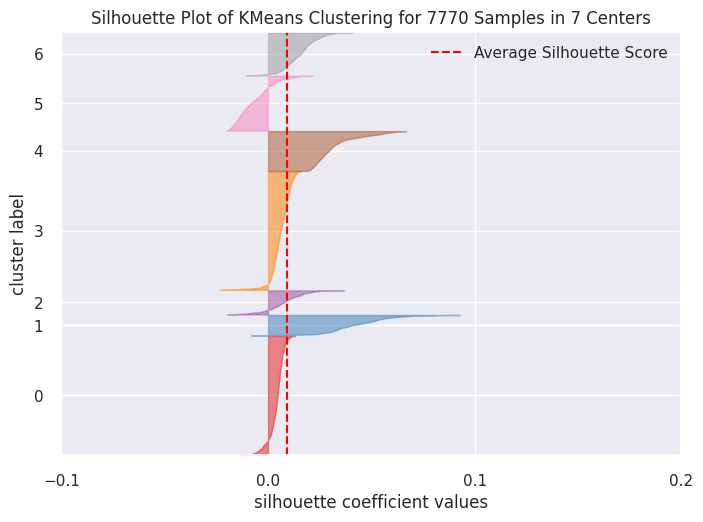

For n_clusters = 8, silhouette score is 0.010142725088012209


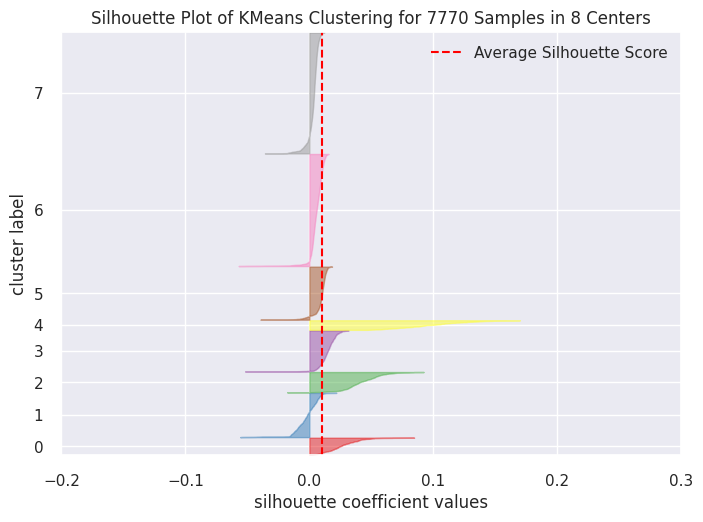

For n_clusters = 9, silhouette score is 0.010237651011355105


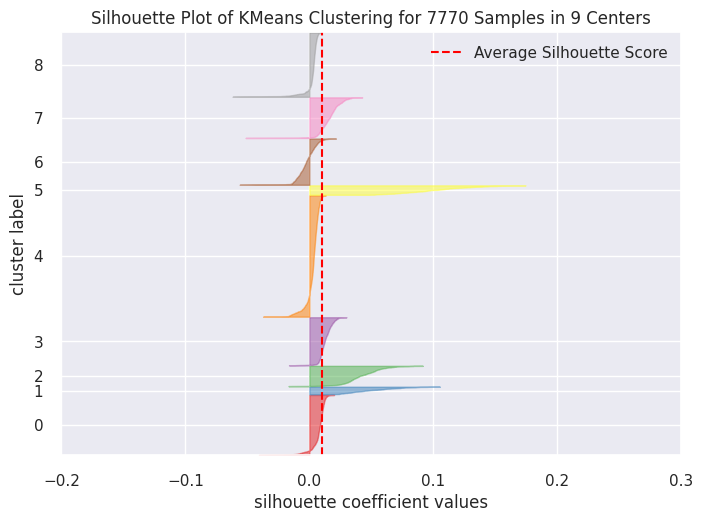

For n_clusters = 10, silhouette score is 0.012147550934143075


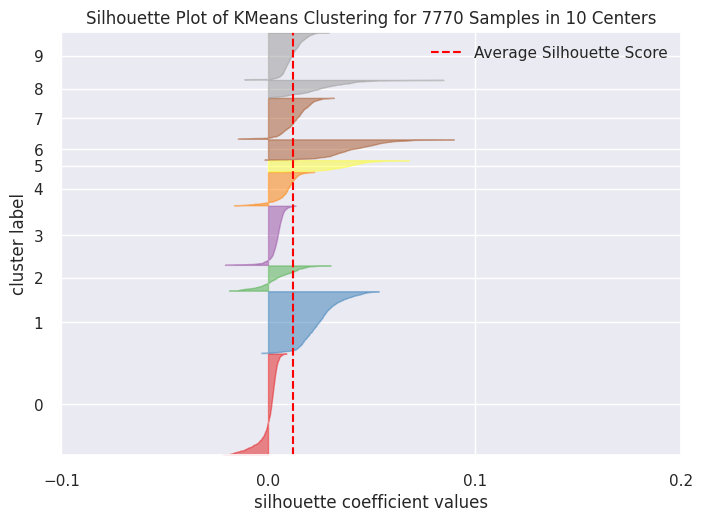

For n_clusters = 11, silhouette score is 0.010015453424227038


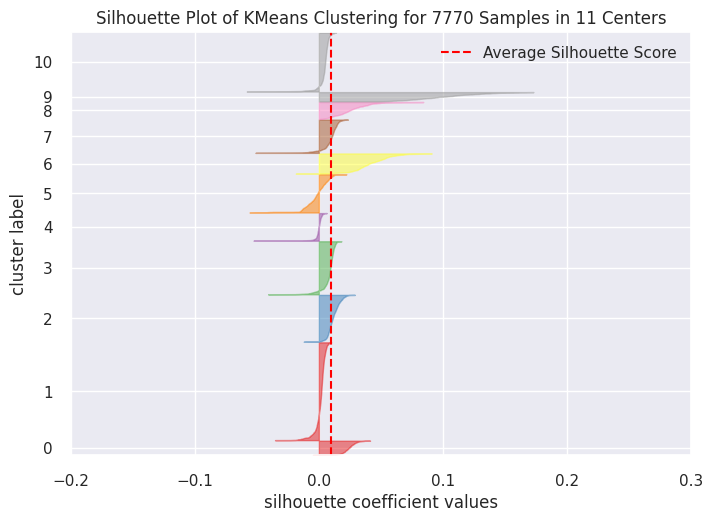

For n_clusters = 12, silhouette score is 0.011632541774673193


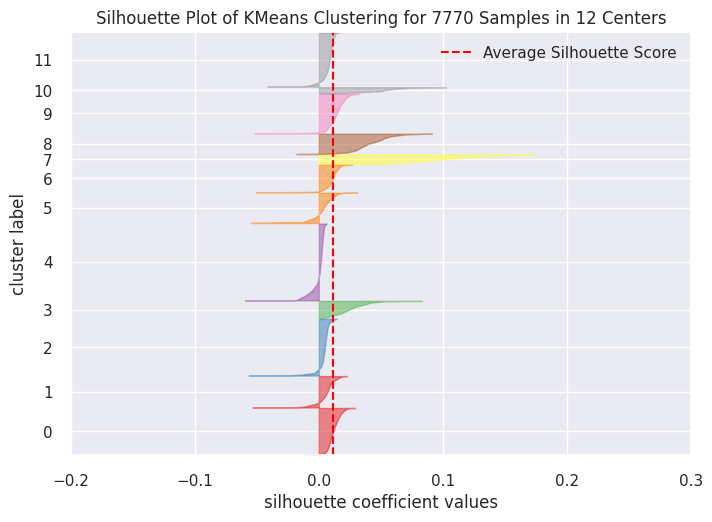

For n_clusters = 13, silhouette score is 0.011188747814227969


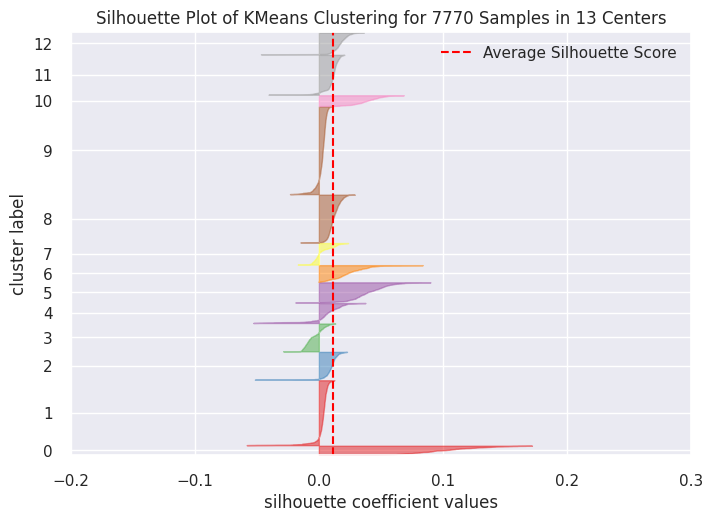

For n_clusters = 14, silhouette score is 0.012450811553571367


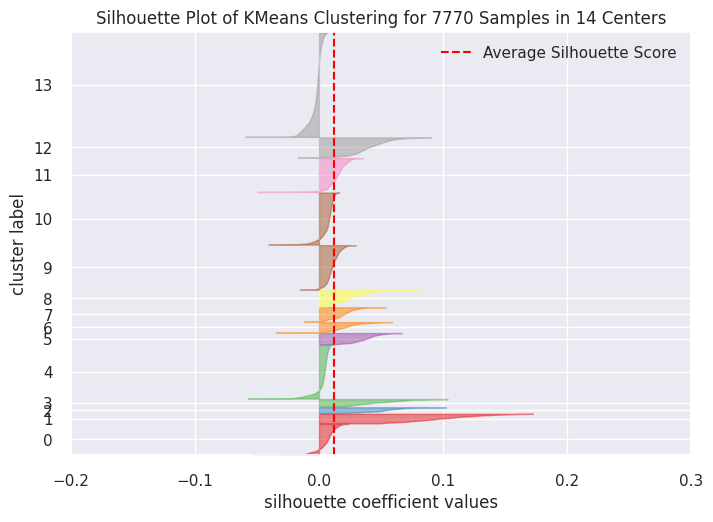

In [ ]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

**1:** Means clusters are well apart from each other and clearly distinguished.

**0:** Means clusters are indifferent, or we can say that the distance between clusters is not significant.

**-1:** Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

We utilized the Silhouette Coefficient as our hyperparameter optimization technique to determine the optimal number of clusters. By calculating the Silhouette Coefficient for various numbers of clusters ranging from 2 to 14, we were able to assess the quality of clustering and identify the configuration that maximizes cluster cohesion and separation.

Our analysis revealed that the Silhouette Coefficient was highest for 5 clusters, indicating that this configuration achieved the best balance between intra-cluster cohesion and inter-cluster separation. Consequently, we selected 5 as the optimal number of clusters for our dataset.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

A higher silhouette score suggests that the clusters are dense and well-separated, which is desirable for business applications. It indicates that the clustering algorithm has effectively grouped similar data points together, leading to clearer and more distinct clusters. This can lead to improved decision-making, targeted marketing strategies, and better customer segmentation.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In our analysis, we primarily considered the Silhouette Score as the key evaluation metric for optimizing the number of clusters. The Silhouette Score is a robust measure that assesses the quality of clustering by quantifying how similar an object is to its own cluster compared to other clusters. A higher Silhouette Score indicates better-defined clusters with greater cohesion and separation.

The optimal number of clusters derived from the Silhouette Score provides invaluable insights into the underlying structure of the data. By accurately partitioning the dataset into distinct groups, businesses can gain a deeper understanding of their customer base, market segments, or other relevant entities. This enhanced understanding facilitates more targeted and personalized strategies, leading to improved customer engagement, satisfaction, and retention.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After analyzing the performance of various clustering models, including K-Means Clustering, Agglomerative Clustering - Hierarchical Clustering and
Silhouette Score for Clustering we have determined that the K-Means Clustering model is the most suitable for our dataset.

**1. Optimal Number of Clusters:** Through the Elbow Method and Silhouette Score evaluation metrics, we identified that the optimal number of clusters for our dataset is 6. This provides a meaningful segmentation of our data without excessive granularity or overlap.

**2. Clustering Effectiveness:** Visualizations of the K-Means Clustering results demonstrate clear and well-defined clusters, indicating that the algorithm effectively partitions the data based on similarity metrics. This suggests that the clusters generated by the K-Means model are meaningful and useful for downstream analysis.

**3. Business Relevance:** K-Means Clustering is widely used for customer segmentation, product categorization, and market segmentation in various industries. Given the goal of our problem, which likely involves identifying groups of similar examples within the data, K-Means Clustering aligns well with the business objectives.

**4. Ease of Interpretation:** K-Means Clustering provides straightforward and interpretable results, making it easier for stakeholders to understand and act upon the generated clusters. This simplicity enhances the usability of the model and facilitates informed decision-making within the business.


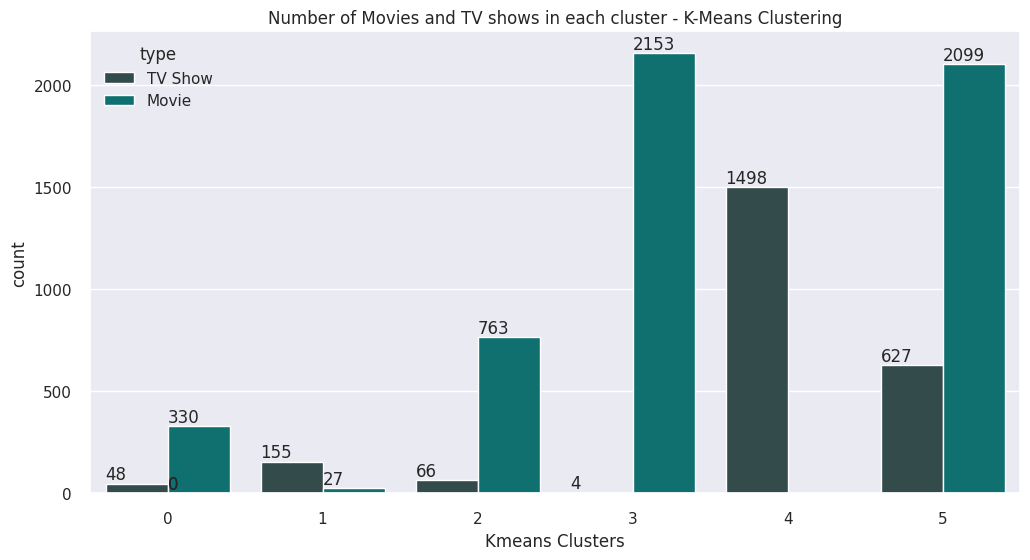

In [ ]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=netflix_data, hue='type', palette=['darkslategray', 'teal'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')

In [ ]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features
def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in netflix_data[netflix_data['K_mean_cluster']==cluster_num].tags.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'winter').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()

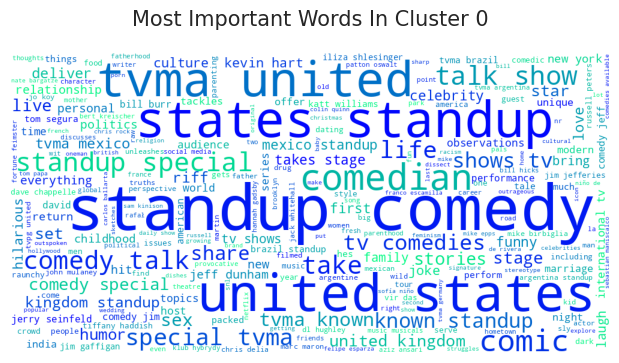

In [ ]:
# WordCloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: united states, documentaries, international movies etc.**

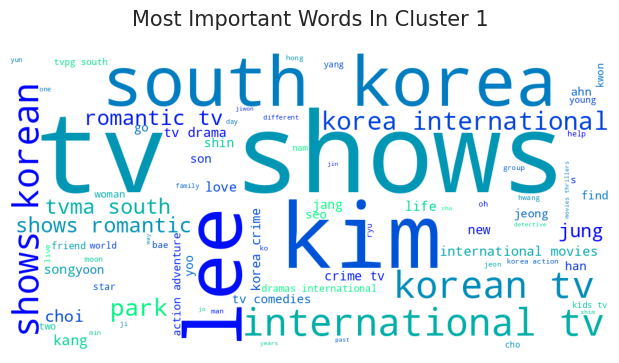

In [ ]:
# WordCloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: action adventure, united states, international movies etc.**

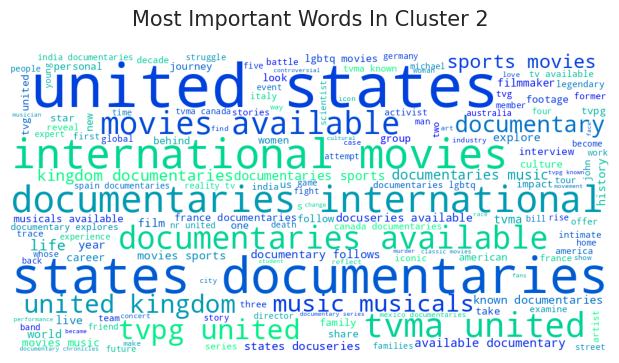

In [ ]:
# WordCloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: united states, standup comedy, comedian, tv etc.**

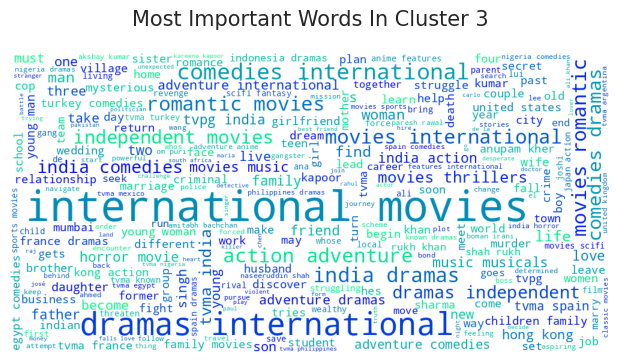

In [ ]:
# WordCloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: international tv, tv show, drama, crime tv etc.**

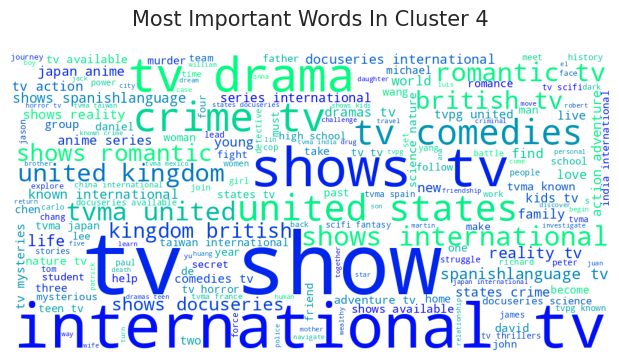

In [ ]:
# WordCloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: international movies, drama, comedies, romantic etc.**

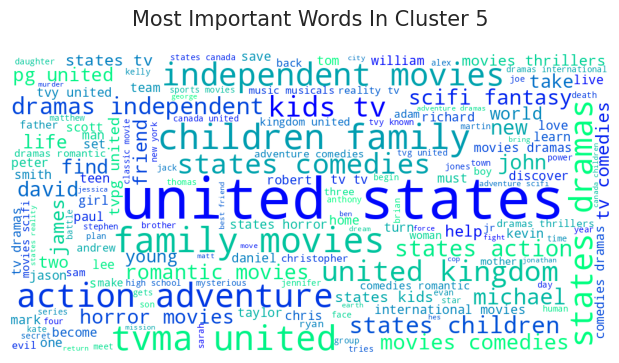

In [ ]:
# WordCloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 5: united states, children, family, dramas, independent movies etc.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In this implementation, topic modeling is utilized to uncover underlying themes or topics within the dataset. The process involves two main steps: vectorization of the text data and topic modeling using Latent Dirichlet Allocation (LDA) algorithm.

In [ ]:
# Use count vectorization process for our data
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
document_term_matrix=count_vectorizer.fit_transform(netflix_data['tags'])

In [ ]:
# LDA model

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6)
lda.fit_transform(document_term_matrix)

array([[0.00357323, 0.00356356, 0.39475731, 0.59098222, 0.00355735,
        0.00356632],
       [0.00507331, 0.15424554, 0.82541473, 0.00508988, 0.00509892,
        0.00507761],
       [0.00420484, 0.18661196, 0.34071468, 0.41875361, 0.00418845,
        0.04552646],
       ...,
       [0.0073194 , 0.00728476, 0.38338108, 0.00726406, 0.58745579,
        0.00729492],
       [0.00619512, 0.00621134, 0.53094742, 0.00620518, 0.00619511,
        0.44424584],
       [0.00696057, 0.13412362, 0.00696375, 0.00700651, 0.4744425 ,
        0.37050304]])

In [ ]:
# Most Important Features for Each Topic
vocab = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
movies tv international tvma dramas 

Topic 1: 
movies international india dramas comedies 

Topic 2: 
tv shows international tvma dramas 

Topic 3: 
united states movies comedies family 

Topic 4: 
united states tvma movies standup 

Topic 5: 
tv united shows states available 



In [ ]:
# Generate WordCloud Images for Given Topics
# Define a Function for Visualize Most Important Features for Each Topic
def draw_word_cloud(topic_num):

  # Create a String to Store All The Words
  imp_words_topic=""

  # Set Parameters
  comp=lda.components_[topic_num]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'magma').generate(imp_words_topic)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Features in Topic {topic_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  #Display Chart
  plt.show()

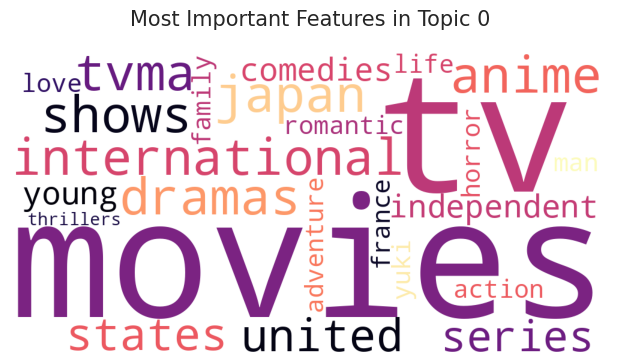

In [ ]:
# WordCloud for Topic 0
draw_word_cloud(0)

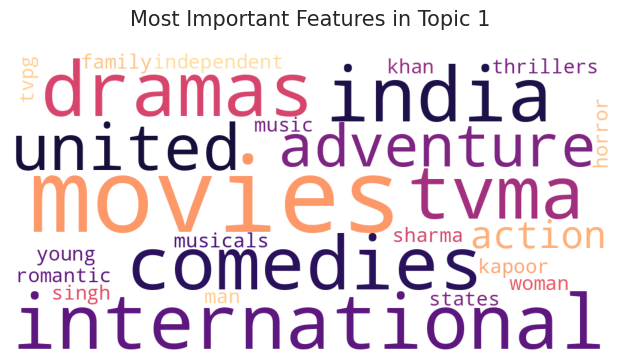

In [ ]:
# WordCloud for Topic 1
draw_word_cloud(1)

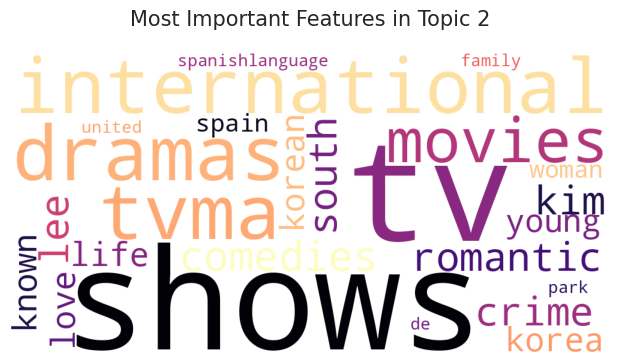

In [ ]:
# WordCloud for Topic 2
draw_word_cloud(2)

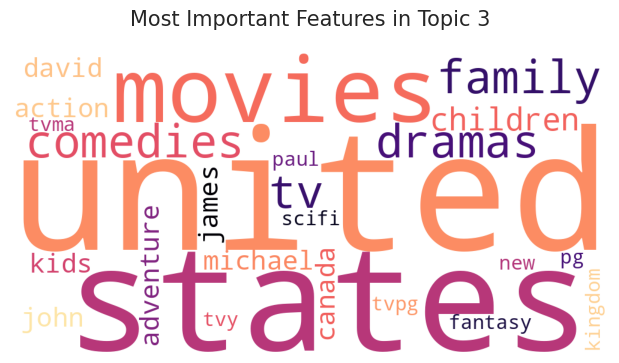

In [ ]:
# WordCloud for Topic 3
draw_word_cloud(3)

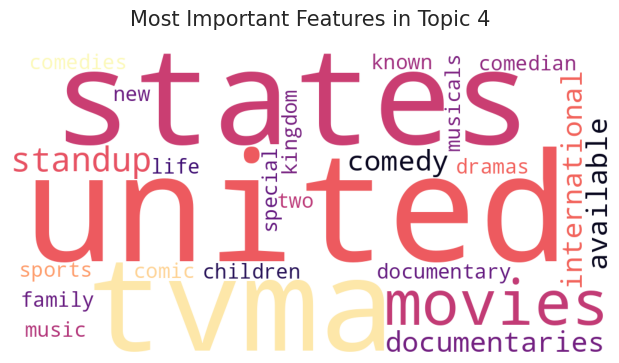

In [ ]:
# WordCloud for Topic 4
draw_word_cloud(4)

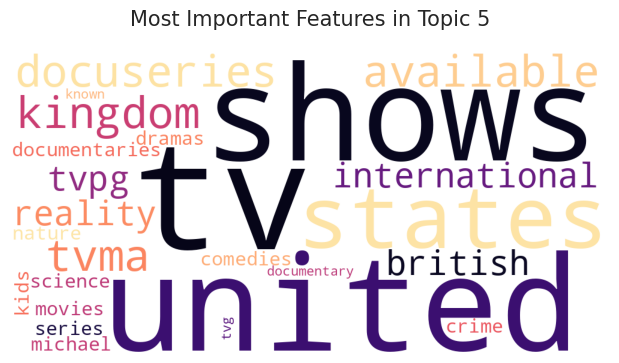

In [ ]:
# WordCloud for Topic 5
draw_word_cloud(5)

## ***8. Recommender System***

A recommender system is a type of information filtering system that suggests items to users based on their preferences, interests, or past behavior. It is commonly used in various applications such as e-commerce websites, streaming platforms, social media, and more. The goal of a recommender system is to provide personalized recommendations that are relevant and helpful to the individual user.

Content-based filtering: This approach recommends items similar to the ones a user has liked or interacted with in the past. It analyzes the content or attributes of items and finds similar items to recommend. For example, if a user enjoys watching action movies, the system may recommend other action movies based on genre, actors, or plot.

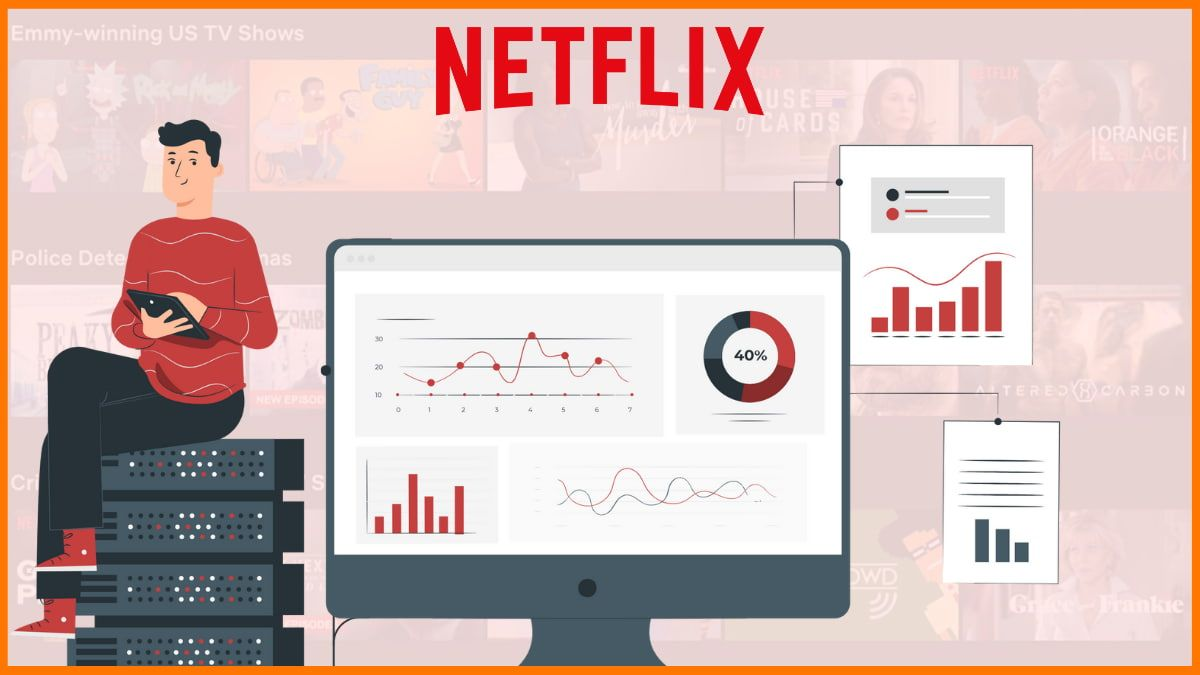

In [ ]:
# Defining a new dataframe for building a recommender system
recommender_df = netflix_data.copy()

# Resetting index
recommender_df.reset_index(inplace=True)

# Dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [ ]:
# Calculate cosine similarity on transformed array independent features created from tags(cluster) column
similarity = cosine_similarity(X)

In [ ]:
# Define a function which recommends top 10 shows on the basis of cosine similarity score
def recommend(content):
  try:
    '''
    This function recommends top 10 shows similar to the input show based on their similarity scores.
    '''

    # Find the index position of the input content
    index = recommender_df[recommender_df['title'] == content].index[0]

    # Sorting on the basis of similarity score, in order to find out distances from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # Display the input movie/tv show name
    print('--'*30)
    print(f"Since you liked '{content}', you may also like:")
    print('--'*30)

    # List the top ten recommended movies/tv shows
    for i in distances[1:11]:
      print(netflix_data.iloc[i[0]].title)
  except:
     print(f"Didn't find any matches for '{content}'. Browse other popular TV shows and movies.")

In [ ]:
# Testing Recommender System on a Indian Movie
recommend('Tamasha')

------------------------------------------------------------
Since you liked 'Tamasha', you may also like:
------------------------------------------------------------
Om Shanti Om
The Shaukeens
Break Ke Baad
Unexpectedly Yours
Karthik Calling Karthik
Chupan Chupai
Balu Mahi
Chennai Express
One-Way to Tomorrow
Race 2


In [ ]:
# Testing Recommender System on a International Movie
recommend('Inception')

------------------------------------------------------------
Since you liked 'Inception', you may also like:
------------------------------------------------------------
Before the Flood
Æon Flux
Solomon Kane
Snowden
Peaky Blinders
Apollo 18
Brick
Dragonheart
Tom Segura: Disgraceful
Dragonheart: A New Beginning


In [ ]:
# Testing Recommender System on a TV Show
recommend('Stranger Things')

------------------------------------------------------------
Since you liked 'Stranger Things', you may also like:
------------------------------------------------------------
Beyond Stranger Things
Equilibrium
Good Witch
Anjaan: Special Crimes Unit
Ghosts of War
Sakho & Mangane
Tread
Ratched
Sleepless Society: Nyctophobia
Kiss Me First


In [ ]:
# Testing Recommender System on a Content
recommend('3 Idiots')

------------------------------------------------------------
Since you liked '3 Idiots', you may also like:
------------------------------------------------------------
Rang De Basanti
PK
Ek Main Aur Ekk Tu
War Chhod Na Yaar
Ferrari Ki Sawaari
Oh Darling Yeh Hai India
Boom
Maska
No Entry
Dil


## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ML model in a pickle or joblib file format for deployment

In [ ]:
# Save the File
import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('kmeans_model.pkl','wb'))

### 2. Load the saved model file and make predictions on unseen data


In [ ]:
# Load the File and predict unseen data.
# Unserialize process (rb=read byte)
pickled_model= pickle.load(open('kmeans_model.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(X)

array([4, 3, 3, ..., 2, 4, 2], dtype=int32)

In [ ]:
y_kmean

array([4, 3, 3, ..., 2, 4, 2], dtype=int32)

- Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering  can lead to numerous intriguing discoveries.

- By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.

# **Conclusion**

In our project, we embarked on a comprehensive exploration of a dataset comprising 7787 records and 12 attributes from Netflix, with a primary focus on addressing missing values and conducting insightful exploratory data analysis (EDA).

**Key Insights:**

Our analysis revealed intriguing trends within the dataset. Notably, we observed that Netflix boasts a vast collection of movies compared to TV shows, with a notable surge in the acquisition of shows originating from the United States.

**Feature Selection and Transformation:**

To effectively cluster the shows, we strategically selected six pivotal attributes: director, cast, country, genre, rating, and description, all of which were categorical variables. We transformed these attributes into a 9000-feature TF-IDF vectorization. To mitigate the curse of dimensionality, we employed Principal Component Analysis (PCA), reducing the components to 2500 while retaining over 80% of the variance.

**Clustering Analysis:**

Utilizing K-Means and Agglomerative clustering algorithms, we endeavored to group the shows based on their inherent similarities. The elbow method in K-Means analysis confirmed the optimal number of clusters to be 6. However, Silhouette score analysis suggested 5 clusters. In Agglomerative clustering, the optimal number of clusters was again determined to be 6, which we vividly visualized using a dendrogram.

**Recommender System Development:**

Building upon our clustering efforts, we developed a sophisticated content-based recommender system. Leveraging the similarity matrix derived through cosine similarity, our system offers personalized recommendations tailored to the user's viewing history. By analyzing the types of shows the user has watched, it furnishes ten top-notch suggestions, empowering users to delve into captivating content aligned with their preferences.

